In [327]:
import numpy as np
import pandas as pd 
import seaborn as sns
import eli5   #feature importance: permutation importance
import matplotlib.pyplot as plt
import string
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer #rule-based sentiment analysis

In [2]:
#load data
reviews = pd.read_csv('reviews.csv')
calendar = pd.read_csv('calendar.csv')
listings = pd.read_csv('listings.csv')

In [4]:
reviews.shape, calendar.shape, listings.shape

((84849, 6), (1393570, 4), (3818, 92))

In [ ]:
listings.head()

In [ ]:
reviews.head()

# Reviews

**Questions: # of reviews vs. month and year, any trend? Sentiments of the reviews.**

In [ ]:
# review years
reviews['date'].apply(lambda x: x.split('-')[0]).value_counts()

In [3]:
#convert date to Year, Month and Day
review_date = pd.DataFrame(data=reviews['date'].apply(lambda x: x.split('-')).tolist(), \
                           columns=['Year', 'Month', 'Day'])

In [4]:
review_date.head()

,Year,Month,Day
0,2015,07,19
1,2015,07,20
2,2015,07,26
3,2015,08,02
4,2015,08,10


In [4]:
review_date_grouped = review_date.groupby(['Year', 'Month']).size().reset_index()

In [5]:
review_date_grouped.columns =['Year', 'Month', 'Count']

In [7]:
review_date_grouped.head(20)

,Year,Month,Count
0,2009,06,2
1,2009,07,1
2,2009,08,1
3,2009,09,2
4,2009,10,6
5,2009,11,5
6,2010,01,3
7,2010,02,3
8,2010,03,7
9,2010,04,5


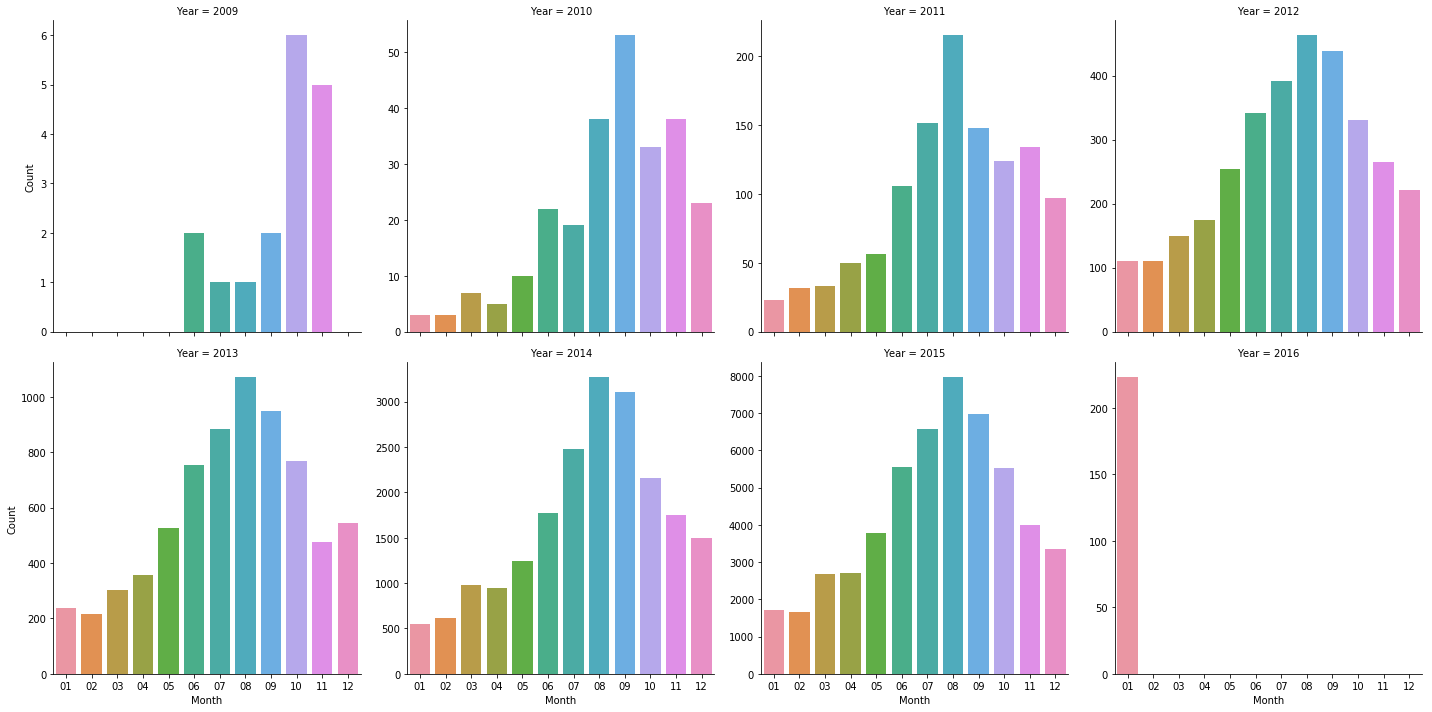

In [8]:
## Most of reviews were written during summary. Is it because most of rents happened in summer?
sns.catplot(x='Month',y='Count', col='Year', col_wrap=4,data=review_date_grouped, kind='bar', sharey=False);

In [17]:
def clean_text(s):
    '''
    Split stirng into words
    convert to lower case
    remove punctuation marks
    '''
    s = ''.join([c for c in s if c not in string.punctuation])
    words =s.lower().split()
    return words

In [13]:
#from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

In [14]:
def sentiment_analyzer_scores(sentence):
    score = analyser.polarity_scores(sentence)
    print("{:-<40} {}".format(sentence, str(score)))

In [15]:
sentiment_analyzer_scores(reviews.comments[0])

Cute and cozy place. Perfect location to everything!  {'neg': 0.0, 'neu': 0.462, 'pos': 0.538, 'compound': 0.7901}


In [16]:
sentiment_analyzer_scores(reviews.comments[3])

Close to Seattle Center and all it has to offer - ballet, theater, museum, Space Needle, restaurants of all ilk just blocks away, and the Metropolitan (probably the coolest grocer you'll ever find). Easy to find and Kelly was warm, welcoming, and really interesting to talk to.  {'neg': 0.035, 'neu': 0.765, 'pos': 0.2, 'compound': 0.8313}


In [17]:
[analyser.polarity_scores(s) for s in reviews.comments[:10]]

[{'neg': 0.0, 'neu': 0.462, 'pos': 0.538, 'compound': 0.7901},
 {'neg': 0.0, 'neu': 0.609, 'pos': 0.391, 'compound': 0.9872},
 {'neg': 0.043, 'neu': 0.772, 'pos': 0.185, 'compound': 0.8718},
 {'neg': 0.035, 'neu': 0.765, 'pos': 0.2, 'compound': 0.8313},
 {'neg': 0.0, 'neu': 0.655, 'pos': 0.345, 'compound': 0.9783},
 {'neg': 0.0, 'neu': 0.631, 'pos': 0.369, 'compound': 0.9349},
 {'neg': 0.0, 'neu': 0.547, 'pos': 0.453, 'compound': 0.9421},
 {'neg': 0.028, 'neu': 0.67, 'pos': 0.302, 'compound': 0.9671},
 {'neg': 0.104, 'neu': 0.758, 'pos': 0.138, 'compound': 0.5562},
 {'neg': 0.0, 'neu': 0.81, 'pos': 0.19, 'compound': 0.8613}]

In [19]:
# calendar
calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [20]:
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [25]:
len(np.unique(reviews.listing_id)), len(np.unique(calendar.listing_id)), len(np.unique(listings.id))

(3191, 3818, 3818)

In [26]:
calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


# Calendar

**Questions:
What are the occupancy/availability rates? Do they depend on seasons and neighborhoods?**

In [618]:
calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [728]:
# convert price from string to float
calendar['price'] = calendar['price'].apply(lambda x: float(x[1:].replace(',','')) if isinstance(x, str) else x)

In [729]:
calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,85.0
1,241032,2016-01-05,t,85.0
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


**Listing price vs. month of the year**

Text(0, 0.5, 'Average Listing Price')

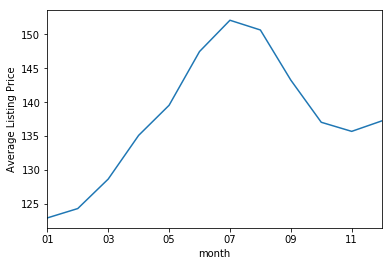

In [890]:
calendar.groupby('month')['price'].mean().plot();
plt.ylabel('Average Listing Price')

**Time span of the calendar dataset is 1 year (365 days)**

In [869]:
# calendar data have 365-day time span
np.unique(calendar.date)

array(['2016-01-04', '2016-01-05', '2016-01-06', '2016-01-07',
       '2016-01-08', '2016-01-09', '2016-01-10', '2016-01-11',
       '2016-01-12', '2016-01-13', '2016-01-14', '2016-01-15',
       '2016-01-16', '2016-01-17', '2016-01-18', '2016-01-19',
       '2016-01-20', '2016-01-21', '2016-01-22', '2016-01-23',
       '2016-01-24', '2016-01-25', '2016-01-26', '2016-01-27',
       '2016-01-28', '2016-01-29', '2016-01-30', '2016-01-31',
       '2016-02-01', '2016-02-02', '2016-02-03', '2016-02-04',
       '2016-02-05', '2016-02-06', '2016-02-07', '2016-02-08',
       '2016-02-09', '2016-02-10', '2016-02-11', '2016-02-12',
       '2016-02-13', '2016-02-14', '2016-02-15', '2016-02-16',
       '2016-02-17', '2016-02-18', '2016-02-19', '2016-02-20',
       '2016-02-21', '2016-02-22', '2016-02-23', '2016-02-24',
       '2016-02-25', '2016-02-26', '2016-02-27', '2016-02-28',
       '2016-02-29', '2016-03-01', '2016-03-02', '2016-03-03',
       '2016-03-04', '2016-03-05', '2016-03-06', '2016-

**No clear correlation beween price and occupancy rate**

In [687]:
#Annual occupancy by listing_id
occupancy = calendar.groupby('listing_id')['available'].apply(lambda x: np.mean(x=='f'))

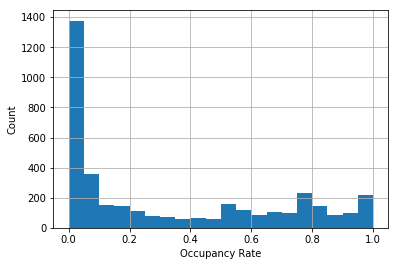

In [683]:
occupancy.hist(bins=20);
plt.xlabel('Occupancy Rate');
plt.ylabel('Count');

In [ ]:
occupancy = calendar.groupby('listing_id')['available'].apply(lambda x: np.mean(x=='f'))

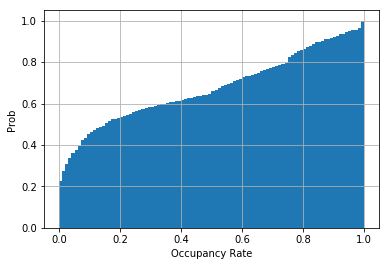

In [684]:
occupancy.hist(cumulative=True, normed=True, bins=100);
plt.xlabel('Occupancy Rate');
plt.ylabel('Prob');

**Distribution of occupancy is very skewed, with a long tail at high occupancy. Media occupancy is only 16%**
Most of the listings have very low occupany, more than 60% of all listings have occupancy less than 50%**

Is occupancy correlated to time of the year and neighborhood?

In [899]:
# Availability = 1 - occupancy
availability = calendar.groupby('listing_id')['available'].apply(lambda x: np.mean(x=='t'))

We'd like to compare availability by neighborhood.
First ceate dataframe of neighborhood for each listing id from listings

In [668]:
neighborhood = listings[['id', 'neighbourhood_group_cleansed']]

**Calculate median availability by neighborhood**

In [900]:
availability_neighborhood = availability.reset_index().merge(right = neighborhood, how='inner', left_on='listing_id', right_on='id')
availability_neighborhood.columns = ['listing_id', 'availability', 'id', 'neighborhood']
availability_neighborhood.drop('id', axis=1, inplace=True)

In [911]:
avai_neighbor_grouped = availability_neighborhood.groupby('neighborhood') \
.agg({'availability':[np.median, len]}) \
.sort_values(('availability', 'median')) \
.reset_index()

In [912]:
avai_neighbor_grouped 

neighborhood availability       
                              median    len
0               Cascade     0.561644   89.0
1            Queen Anne     0.698630  295.0
2              Downtown     0.795890  530.0
3          Capitol Hill     0.827397  567.0
4        Rainier Valley     0.830137  159.0
5               Ballard     0.843836  230.0
6   Other neighborhoods     0.843836  794.0
7          Central Area     0.849315  369.0
8           Beacon Hill     0.886301  118.0
9          West Seattle     0.895890  203.0
10            Northgate     0.909589   80.0
11          Seward Park     0.912329   44.0
12             Delridge     0.917808   79.0
13            Lake City     0.939726   67.0
14  University District     0.946575  122.0
15             Magnolia     0.964384   61.0
16             Interbay     1.000000   11.0

Text(0.5, 0, 'Availability')

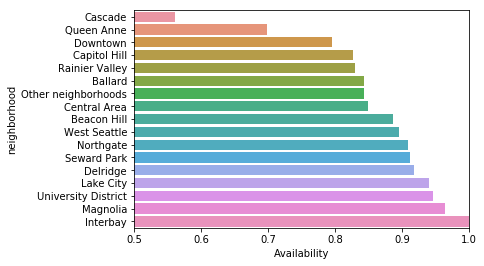

In [916]:
sns.barplot(data=avai_neighbor_grouped, y='neighborhood', x=('availability', 'median'));
plt.xlim(0.5, 1);
plt.xlabel('Availability')

**Cascade** and **Queen Anne** have the lowest availability

In [891]:
# availability
availability_month = calendar.groupby(['month', 'listing_id']).agg({'available': lambda x: np.mean(x=='t')}).reset_index()

In [893]:
availability_month.head()

,month,listing_id,available
0,01,3335,0.066667
1,01,4291,1.000000
2,01,5682,0.366667
3,01,6606,1.000000
4,01,7369,0.100000


**Availability vs. month of the year**

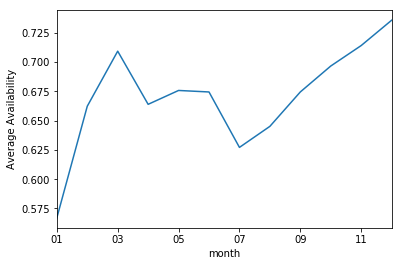

In [894]:
availability_month.groupby('month')['available'].mean().plot();
plt.ylabel('Average Availability');

**Availability distribution**

Text(0.5, 0, 'Avarage Availability')

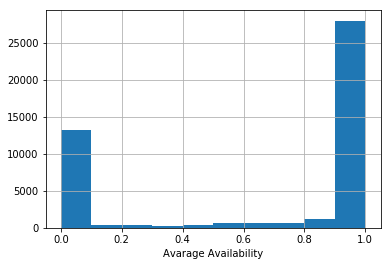

In [897]:
availability_month.available.hist();
plt.xlabel('Avarage Availability')

Average cccupany is the higest in January, then peaks in the summer and reach the lowest in December.

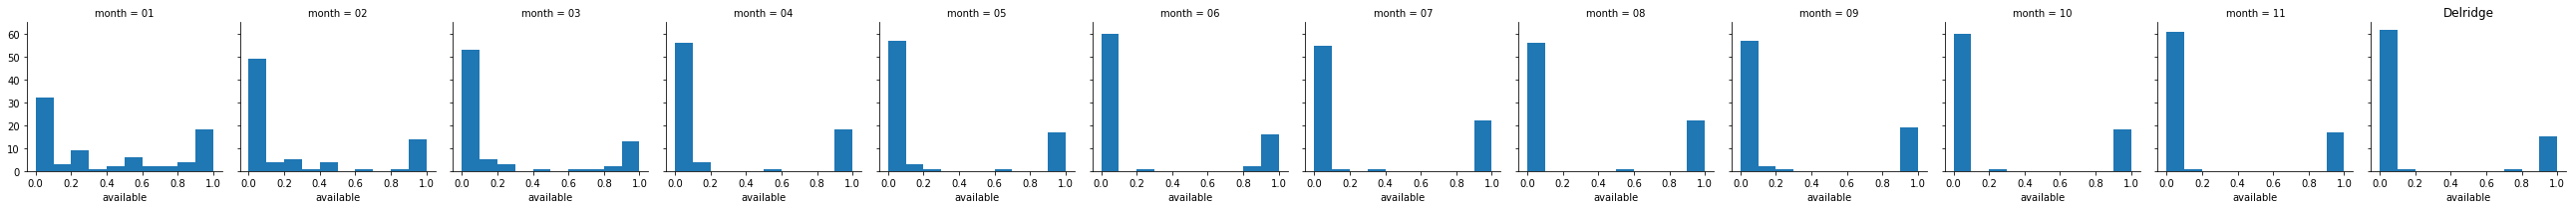

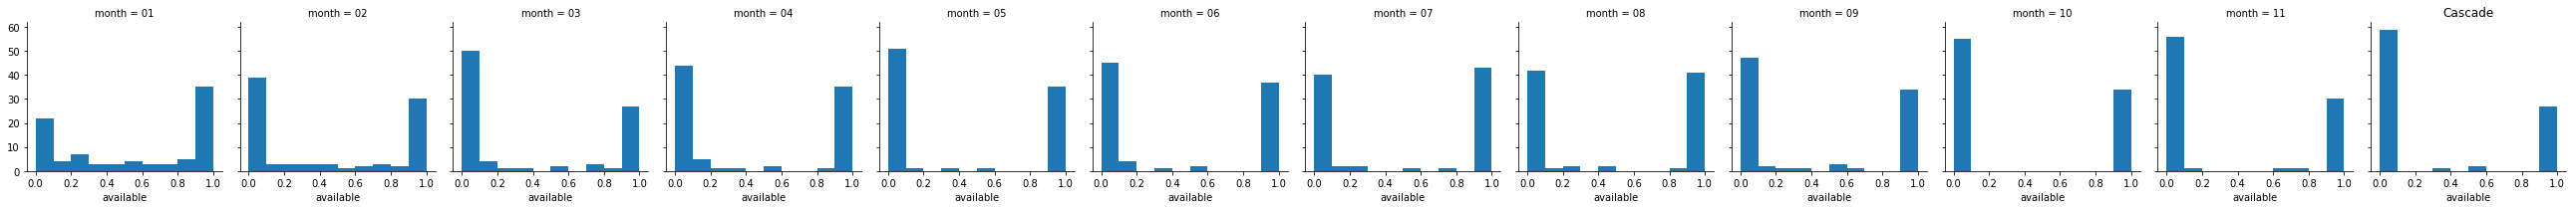

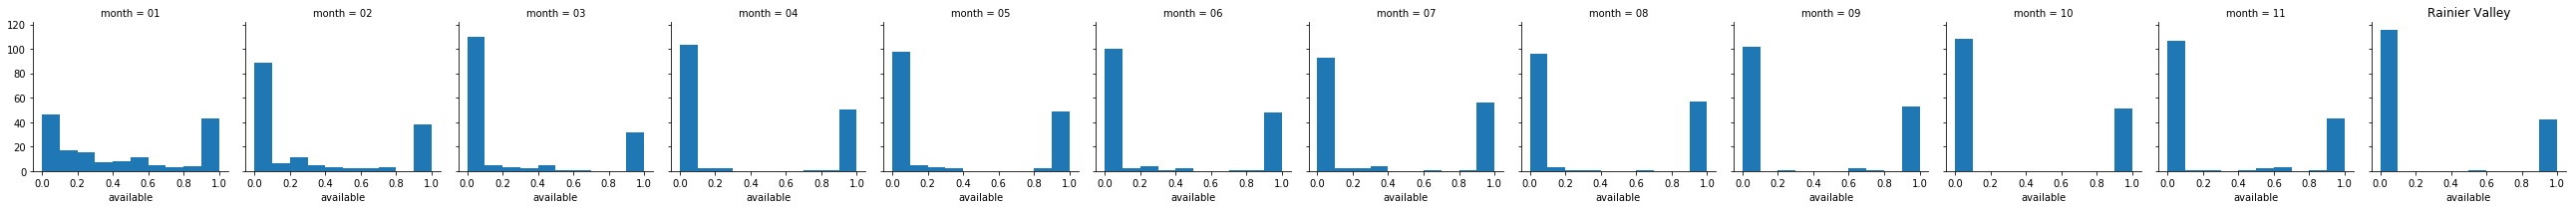

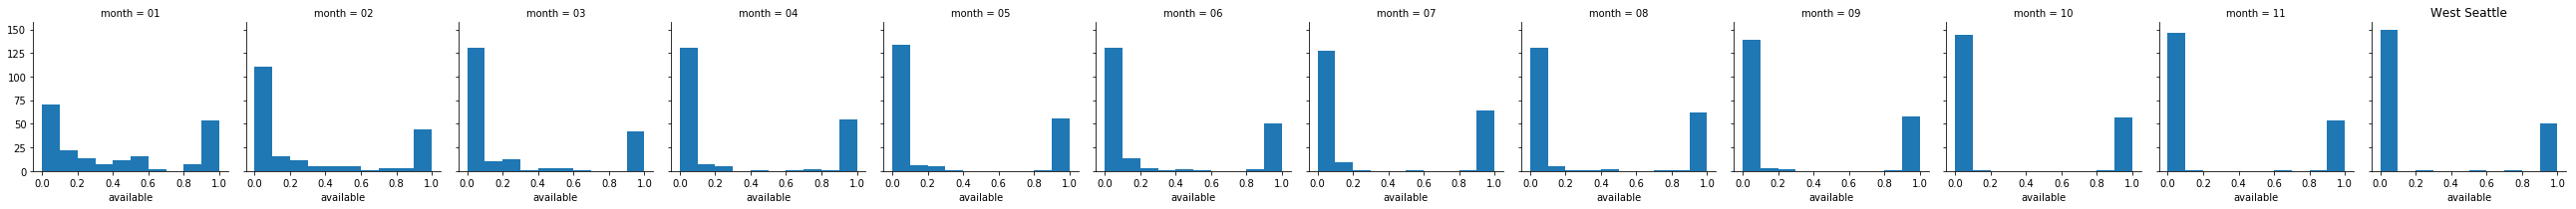

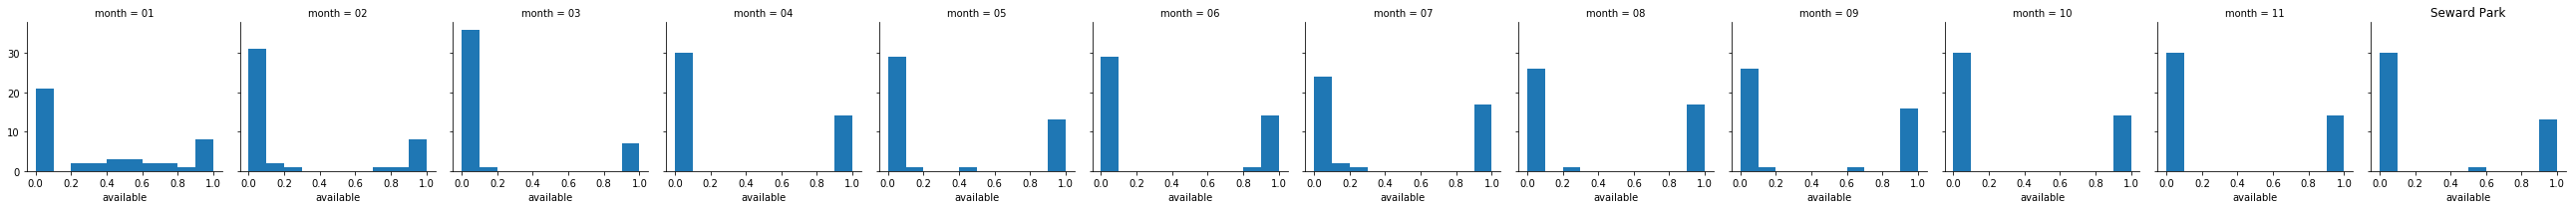

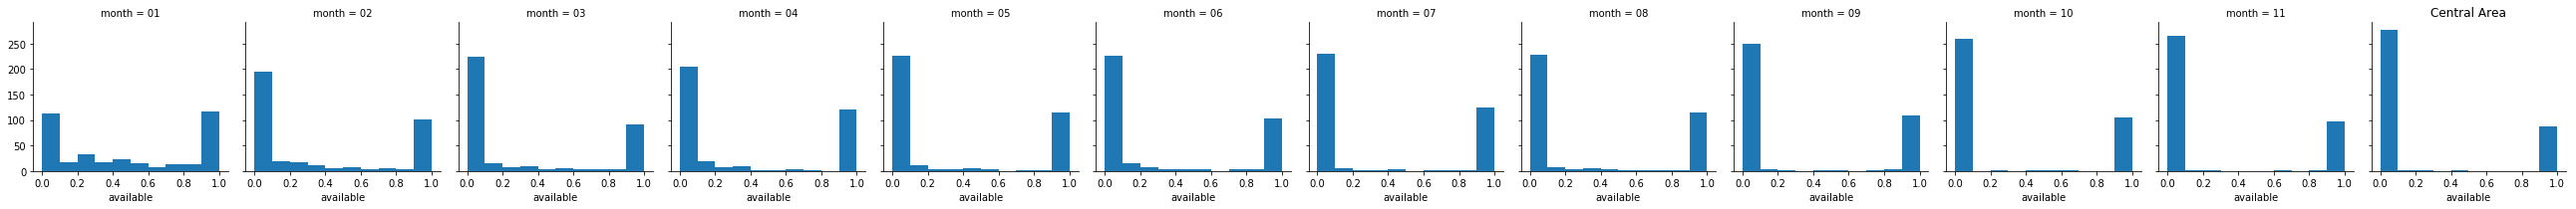

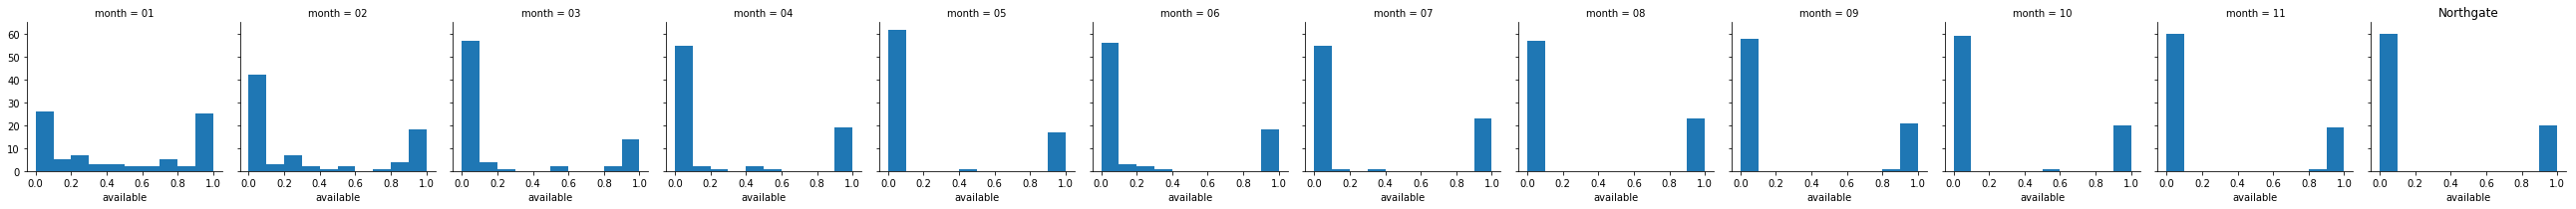

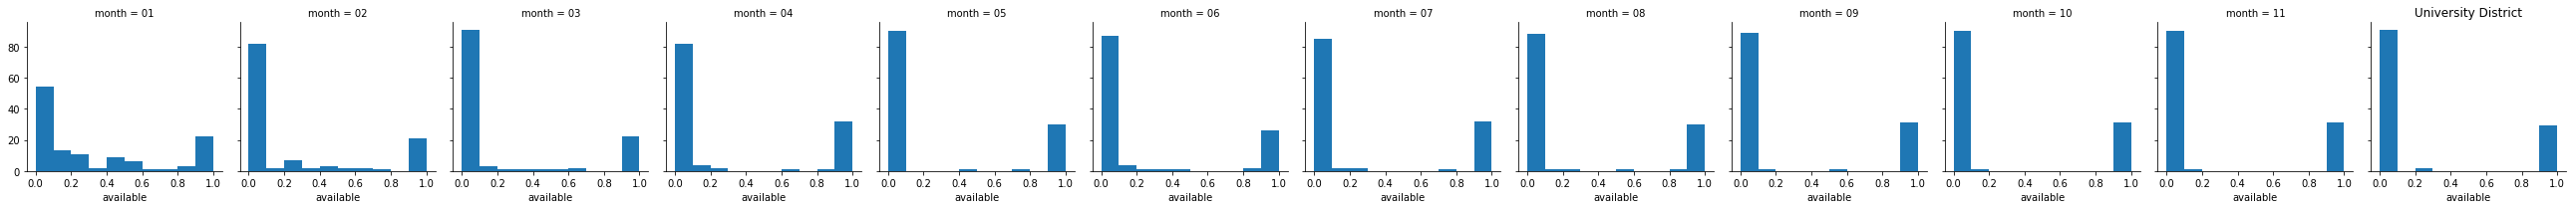

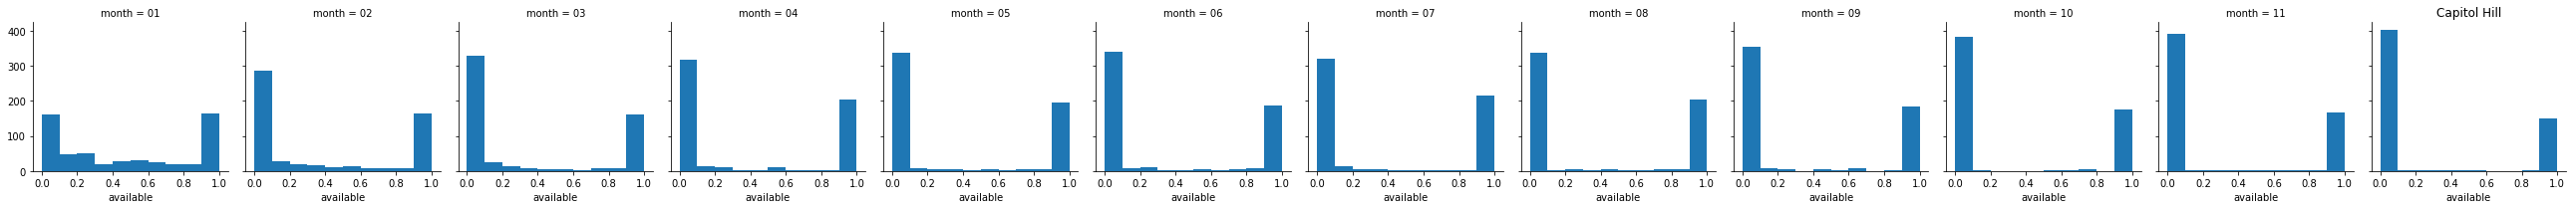

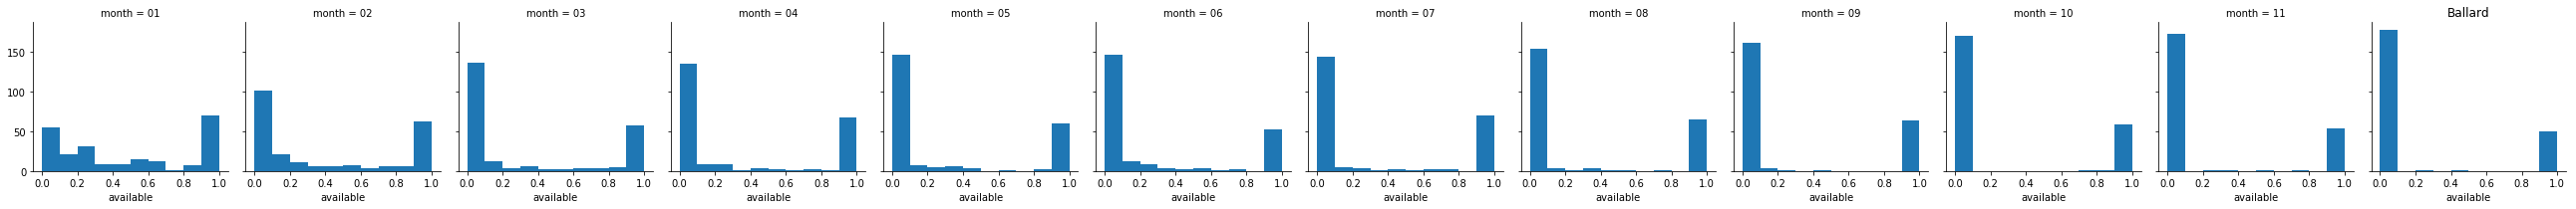

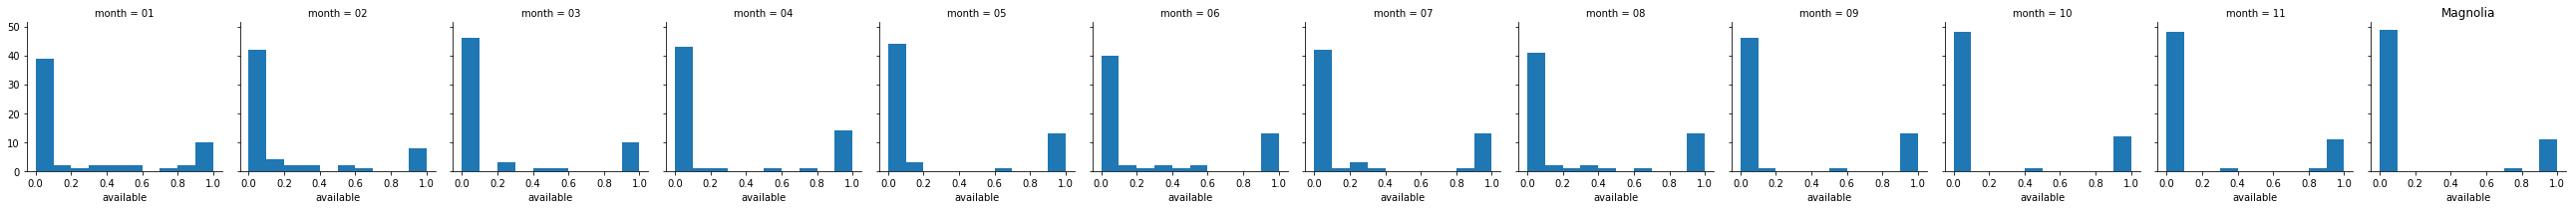

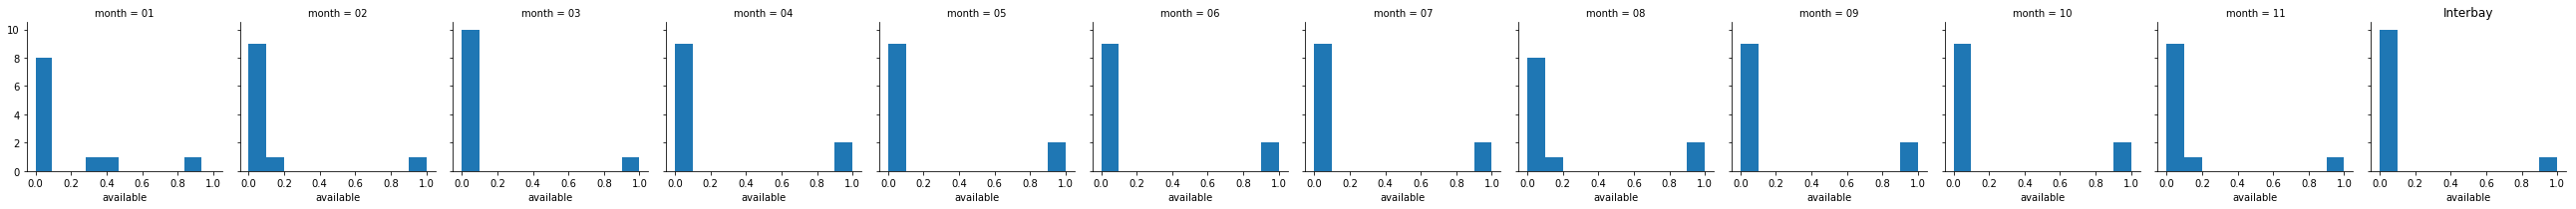

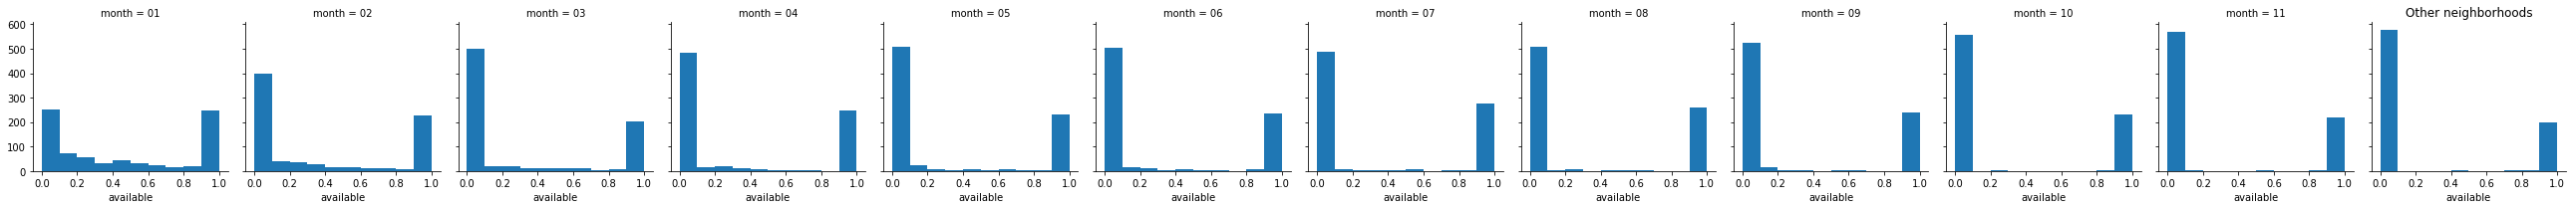

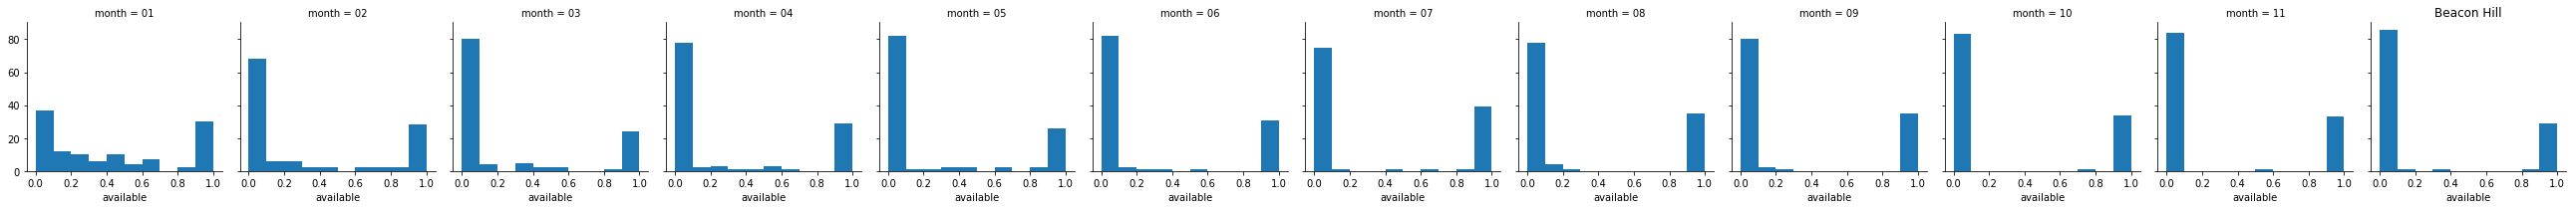

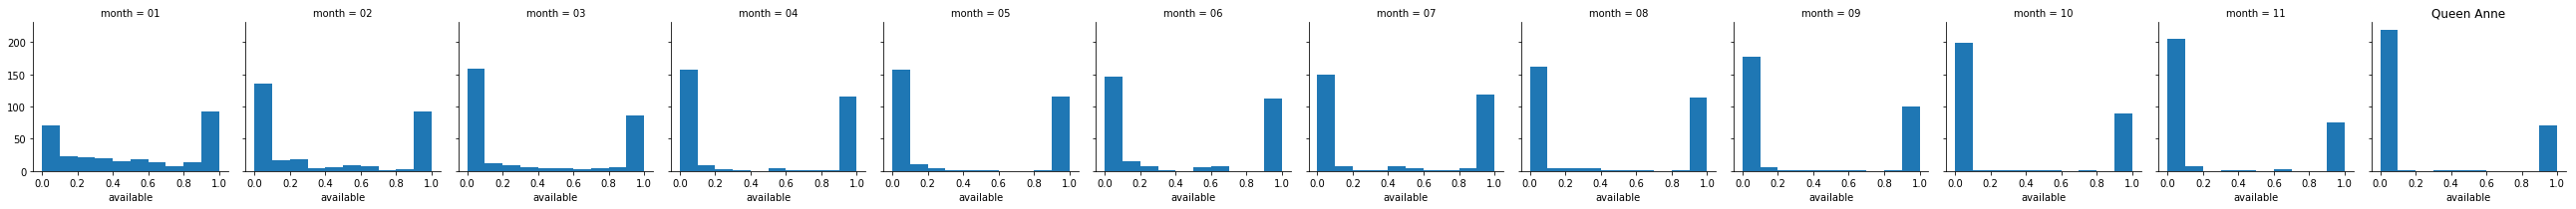

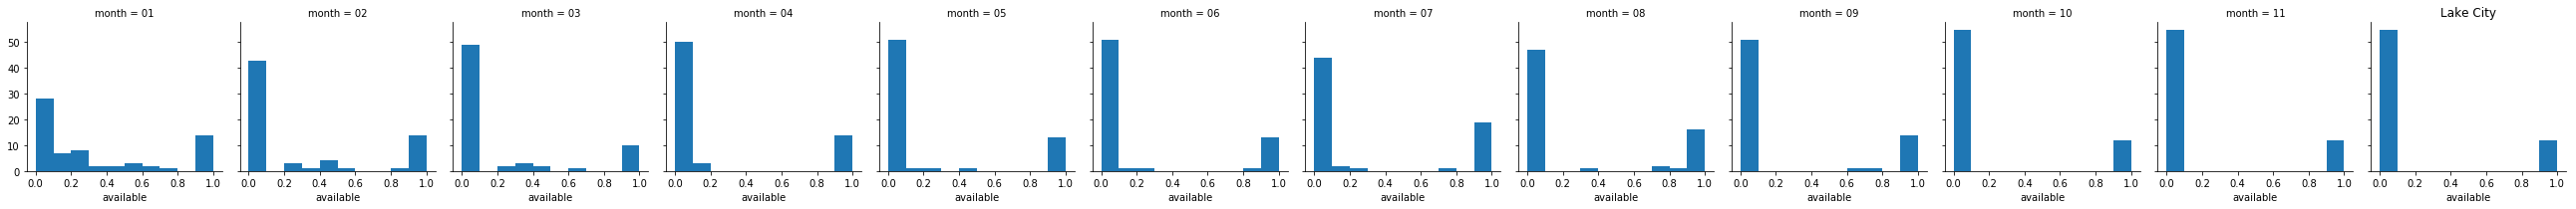

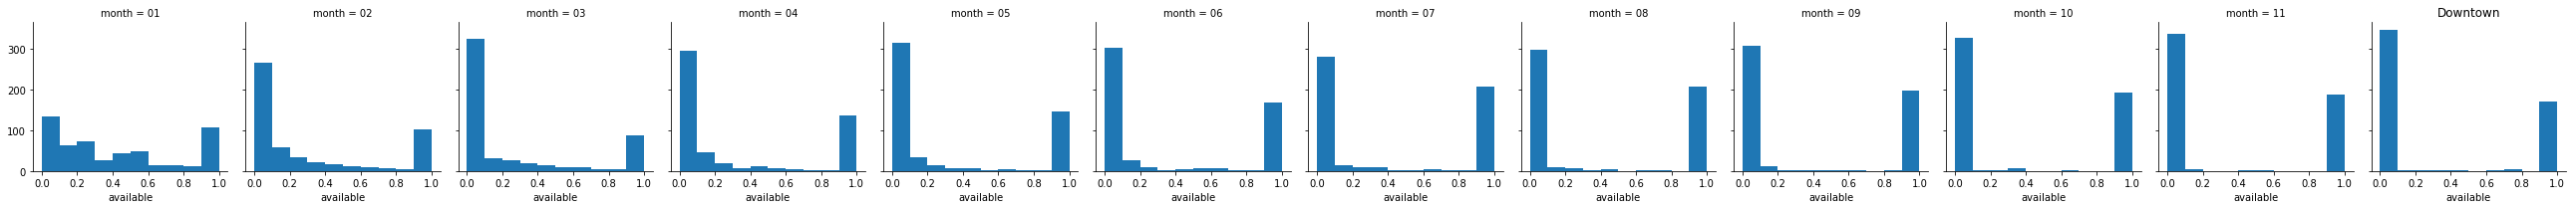

In [801]:
for neig in set(occupancy_month_neighborhood.neighbourhood_group_cleansed):
    occupancy_month_neighborhood[occupancy_month_neighborhood.neighbourhood_group_cleansed==neig]. \
    pipe( (sns.FacetGrid, 'data'), col='month' ). \
    map(plt.hist, 'available'); 
    plt.title(neig)
    plt.show()

# Listings

**Questions: what are the top factors associated with listing ratings and price** 

In [37]:
# listing
listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [38]:
listings.shape

(3818, 92)

In [39]:
listings.last_scraped.apply(lambda x: x[:4]).value_counts()

2016    3818
Name: last_scraped, dtype: int64

In [43]:
listings.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

**Review related features**

In [44]:
[x for x in listings.columns if 'review' in x.lower()]

['number_of_reviews',
 'first_review',
 'last_review',
 'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'reviews_per_month']

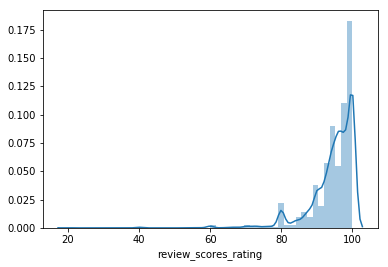

In [51]:
sns.distplot(listings.review_scores_rating.dropna())

**Use cleansed neighborhood column**

In [58]:
listings.neighbourhood_group_cleansed.value_counts()

Other neighborhoods    794
Capitol Hill           567
Downtown               530
Central Area           369
Queen Anne             295
Ballard                230
West Seattle           203
Rainier Valley         159
University District    122
Beacon Hill            118
Cascade                 89
Northgate               80
Delridge                79
Lake City               67
Magnolia                61
Seward Park             44
Interbay                11
Name: neighbourhood_group_cleansed, dtype: int64

**Predictors in the listig rating regression model**

In [149]:
features = ['transit', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_listings_count',
       'host_total_listings_count', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'property_type', 'room_type',
       'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'square_feet', 'price', 'weekly_price', 'monthly_price', 'cleaning_fee', 'guests_included', 'extra_people', 'minimum_nights',
       'maximum_nights', 'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews', 'requires_license', 'instant_bookable','cancellation_policy', 'require_guest_profile_picture',
       'require_guest_phone_verification', 'calculated_host_listings_count',
       'reviews_per_month', 'review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value',]

In [25]:
rating = 'review_scores_rating'

In [80]:
listings[features].select_dtypes(include=np.number).columns

Index(['host_listings_count', 'host_total_listings_count', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'square_feet', 'guests_included',
       'minimum_nights', 'maximum_nights', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'calculated_host_listings_count',
       'reviews_per_month'],
      dtype='object')

In [88]:
listings[features].describe()

,host_listings_count,host_total_listings_count,accommodates,bathrooms,bedrooms,beds,square_feet,guests_included,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,calculated_host_listings_count,reviews_per_month
count,3816.000000,3816.000000,3818.000000,3802.000000,3812.000000,3817.000000,97.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3191.000000
mean,7.157757,7.157757,3.349398,1.259469,1.307712,1.735394,854.618557,1.672603,2.369303,780.447617,16.786276,36.814825,58.082504,244.772656,22.223415,2.946307,2.078919
std,28.628149,28.628149,1.977599,0.590369,0.883395,1.139480,671.404893,1.311040,16.305902,1683.589007,12.173637,23.337541,34.063845,126.772526,37.730892,5.893029,1.822348
min,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000
25%,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,420.000000,1.000000,1.000000,60.000000,2.000000,13.000000,28.000000,124.000000,2.000000,1.000000,0.695000
50%,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,750.000000,1.000000,2.000000,1125.000000,20.000000,46.000000,73.000000,308.000000,9.000000,1.000000,1.540000
75%,3.000000,3.000000,4.000000,1.000000,2.000000,2.000000,1200.000000,2.000000,2.000000,1125.000000,30.000000,59.000000,89.000000,360.000000,26.000000,2.000000,3.000000
max,502.000000,502.000000,16.000000,8.000000,7.000000,15.000000,3000.000000,15.000000,1000.000000,100000.000000,30.000000,60.000000,90.000000,365.000000,474.000000,37.000000,12.150000


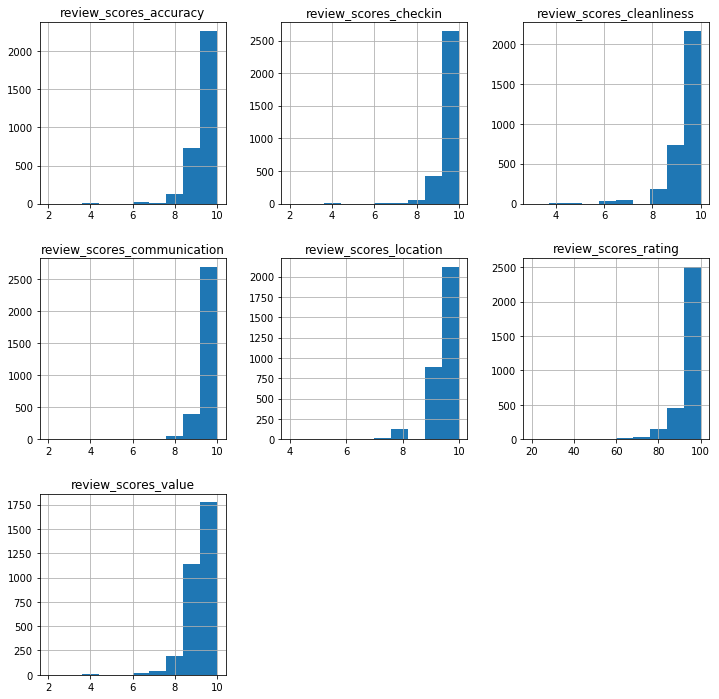

In [91]:
listings.hist(column=[x for x in listings.columns if 'score' in x.lower()], figsize=(12,12));

/home/kezhao/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/kezhao/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


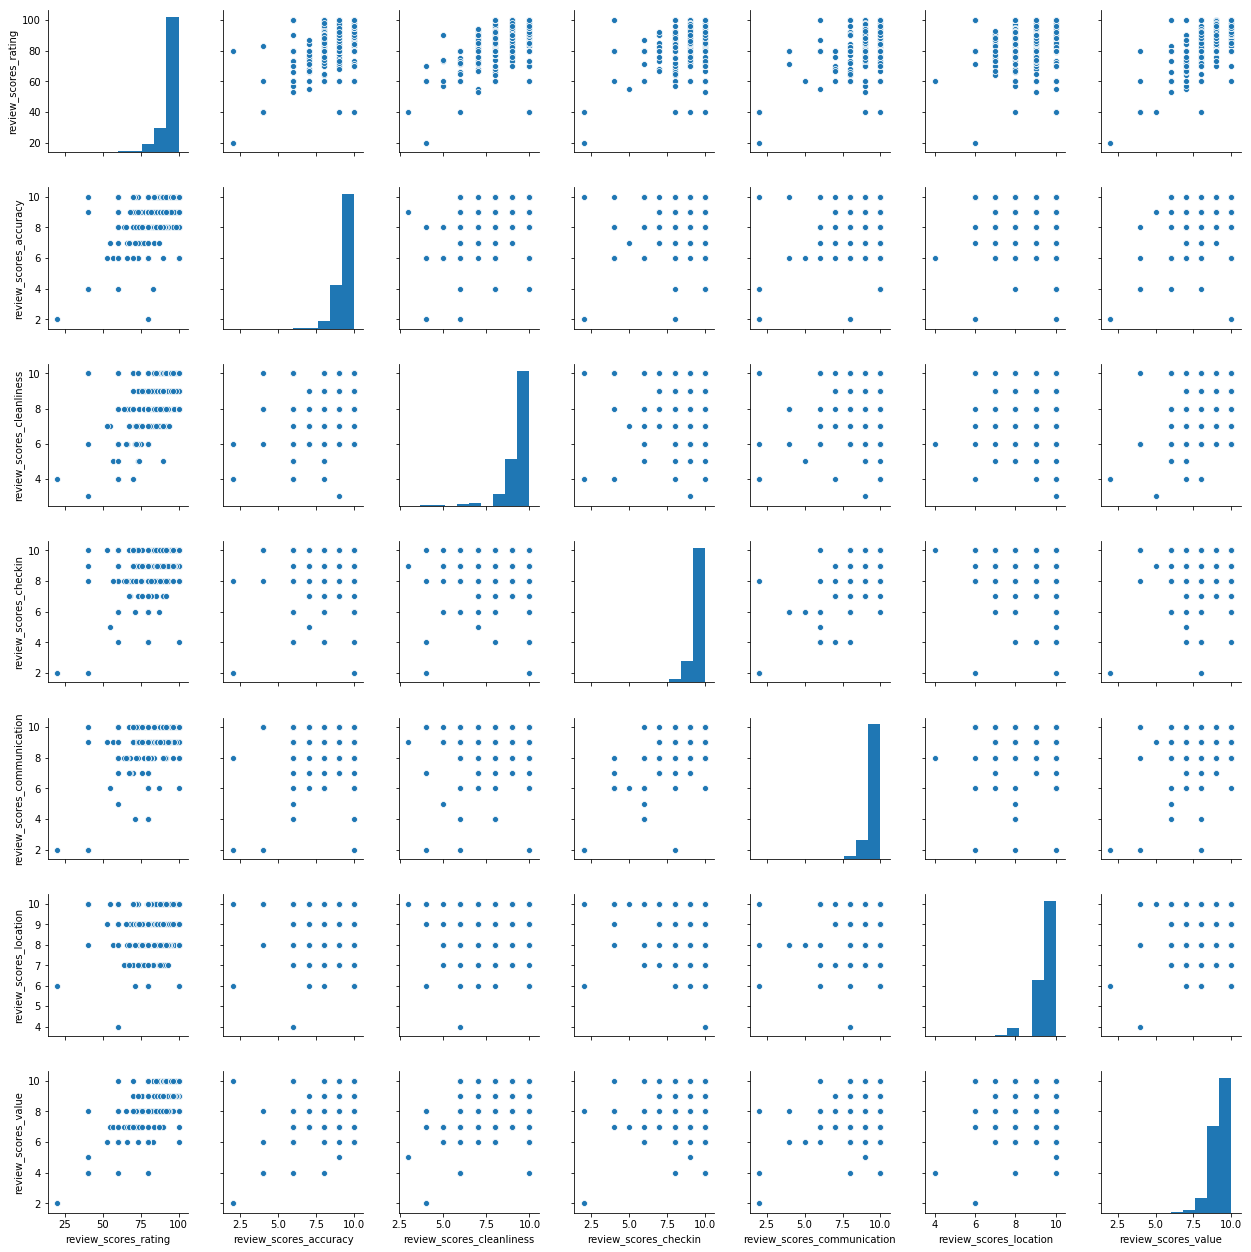

In [92]:
sns.pairplot(listings[[x for x in listings.columns if 'score' in x.lower()]])

it appears that value (price) and cleaniess have some stronger correlation to overall review_score_rating. Use all review_scores as predictors

#### Cleaning Data

In [267]:
df = listings[[rating]+features]

In [238]:
df.shape

(3818, 48)

In [129]:
df.describe()

,review_scores_rating,host_listings_count,host_total_listings_count,accommodates,bathrooms,bedrooms,beds,square_feet,guests_included,minimum_nights,...,availability_365,number_of_reviews,calculated_host_listings_count,reviews_per_month,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
count,3171.000000,3816.000000,3816.000000,3818.000000,3802.000000,3812.000000,3817.000000,97.000000,3818.000000,3818.000000,...,3818.000000,3818.000000,3818.000000,3191.000000,3160.000000,3165.000000,3160.000000,3167.000000,3163.000000,3162.000000
mean,94.539262,7.157757,7.157757,3.349398,1.259469,1.307712,1.735394,854.618557,1.672603,2.369303,...,244.772656,22.223415,2.946307,2.078919,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245
std,6.606083,28.628149,28.628149,1.977599,0.590369,0.883395,1.139480,671.404893,1.311040,16.305902,...,126.772526,37.730892,5.893029,1.822348,0.698031,0.797274,0.595499,0.568211,0.629053,0.750259
min,20.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,1.000000,0.020000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000
25%,93.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,420.000000,1.000000,1.000000,...,124.000000,2.000000,1.000000,0.695000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000
50%,96.000000,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,750.000000,1.000000,2.000000,...,308.000000,9.000000,1.000000,1.540000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
75%,99.000000,3.000000,3.000000,4.000000,1.000000,2.000000,2.000000,1200.000000,2.000000,2.000000,...,360.000000,26.000000,2.000000,3.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
max,100.000000,502.000000,502.000000,16.000000,8.000000,7.000000,15.000000,3000.000000,15.000000,1000.000000,...,365.000000,474.000000,37.000000,12.150000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [268]:
# revmove missing values in rating
df = df.dropna(subset=[rating])
df.index = range(len(df))  #change index 
df.shape

(3171, 48)

In [207]:
len(df)

3171

In [210]:
df.iloc[:5, :5]

,review_scores_rating,transit,host_response_time,host_response_rate,host_acceptance_rate
0,95.0,NaN,within a few hours,96%,100%
1,96.0,"Convenient bus stops are just down the block, ...",within an hour,98%,100%
2,97.0,A bus stop is just 2 blocks away. Easy bus a...,within a few hours,67%,100%
3,92.0,The nearest public transit bus (D Line) is 2 b...,within an hour,100%,NaN
4,95.0,The #1 and #2 bus picks up 2-3 blocks away (di...,NaN,NaN,NaN


#### Covert percentage and dollar amount from strings to numbers

In [131]:
def str2num(s):
    '''convert string of percentage % (e.g., 66%) and $dollar amount (e.g. $3,000) to numbers'''
    if isinstance(s, str): #convert string only, non-string will be left as it (e.g. NaN)
        s = ''.join([c for c in s if c not in '$%,']) # remove $, % and ,
        s = float(s)
    return s

In [269]:
# convert host_response_rate and host_acceptance_rate from string to numerical
#convert weekly_price, monthly_price, cleaning_fee and extra_people from string to numerical dollar values
str2num_cols = ['host_response_rate', 'host_acceptance_rate', 'price', 'weekly_price', 'monthly_price', 'cleaning_fee', 'extra_people' ]
df[str2num_cols] = df[str2num_cols].applymap(str2num)

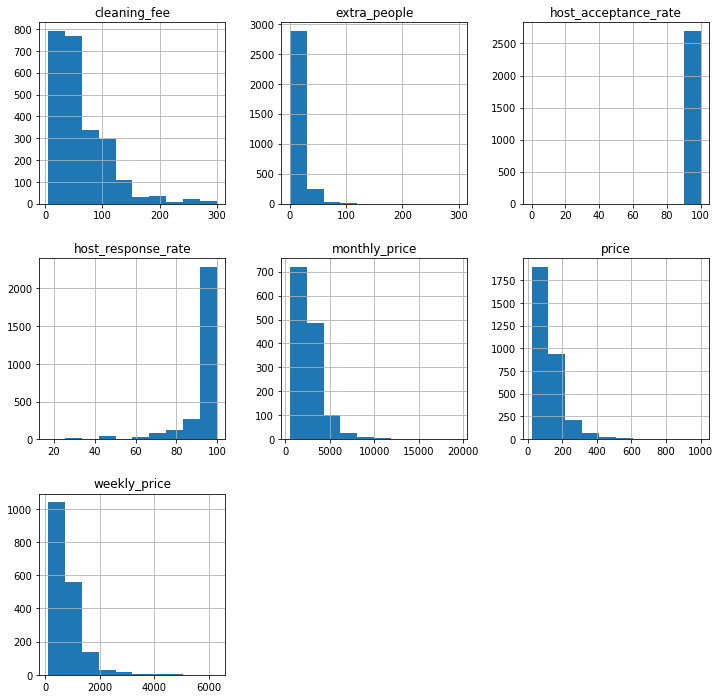

In [241]:
df[str2num_cols].hist(figsize=(12, 12));

#### Convert amenity to one-hot encoding

In [139]:
def clean_string(s, exclude, sep=',', return_type = set ):
    '''
    Given a string, the function removes characters in a list for exclusion; 
    then splits the string into words
    Inputs 
        s: string
        exclude: list of characters to be removed from s
        sep: separation character to split the string into words
        return_type: list or set for the output
    Output:
         Either a list or set of the words in the input string s     
    '''
    if isinstance(s, str):
        #remove characters in exclude list
        s = ''.join([c for c in s if c not in exclude])
        #split into words
        s = s.split(sep=sep)
    else:
        s = [s] #if input s is not a string, return a list of s
    return return_type(s)  #return set

In [141]:
#def encode_amenity(amenity_list, all_amenities_list):
#    '''Encode a list of amenties to a '''
#    return [1 if amenity in amenity_list else 0 for amenity in all_amenities_list]

In [172]:
def encode_amenity(amenity_series):
    amenities = amenity_series.apply(clean_string, exclude='{}"', return_type=set) # set of amenities for each listing
    all_amenities = set()
    for f in amenities:
        all_amenities = all_amenities.union(f)  #set of all amenities of all listings
    all_amenities.discard('') #remove empty string
    all_amenities = list(all_amenities)  #list of distinct amenities
    
    def encode(amenity_list, all_amenities_list):
        return [1 if amenity in amenity_list else 0 for amenity in all_amenities_list]
    
    return pd.DataFrame(data = amenities.apply(encode, all_amenities_list=all_amenities).tolist(), 
                        columns=['Amenity_'+str(i) for i in range(len(all_amenities))]),  all_amenities

In [270]:
# df_amenities: encoded amenities columns; amenities: the actual amenities corresponding to the encoded columns
df_amenities, amenities = encode_amenity(df.amenities)

In [271]:
df.shape, df_amenities.shape

((3171, 48), (3171, 41))

In [272]:
# merge encoded amenities columns into original data frame and remove original amenities columns
df = pd.concat([df, df_amenities], axis=1).drop(columns='amenities')

In [273]:
df.shape

(3171, 88)

#### Convert and encode transit column

In [274]:
## encode transit column

#for each listing, clean the transit description and split it into words
transit_text = df.transit.apply(clean_string, exclude=string.punctuation, sep=' ', return_type=list)
# colleciton of all words in the transit descriptions
transit_all_words = []
for t in transit_text:
    transit_all_words = transit_all_words + t
# Find the most frequent words in the transit descriptions
pd.Series([x.lower() for x in transit_all_words if isinstance(x, str)]).value_counts()[50:100]

have              456
at                456
about             442
one               441
walking           435
all               431
city              431
hill              428
university        427
center            416
it                413
station           412
around            408
transportation    404
2                 400
5                 392
as                391
available         386
access            373
free              358
10                354
buses             354
15                351
which             343
line              336
transit           334
bike              324
your              313
taxi              310
district          309
right             308
very              306
stops             304
be                289
neighborhood      289
20                288
distance          287
few               286
ave               281
two               278
place             277
min               277
close             271
routes            265
3                 264
located   

In [249]:
#coarsely categorize transition into three types (transition description is in multiple languages)
transit_type = {'public': ['bus', 'public', 'público', 'rail', 'station', 'airport', 'metro', '輕軌','車站' ,'機場'], 
                'private': ['car', 'bike', 'parking', 'park', 'walking'], 
                'ride': {'zip','uber', 'über', 'lyft', 'ride', 'taxi', 'cab'}}

In [250]:
def encode_transit(text, transit_type_dict):
    #encode to public, private and ride: 1 = key words in text, 0 keyword not in text
    public = np.any([w.lower() in transit_type_dict['public'] if isinstance(w,str) else False  for w in text])
    private = np.any([w.lower() in transit_type_dict['private'] if isinstance(w,str) else False  for w in text])
    ride = np.any([w.lower() in transit_type_dict['ride'] if isinstance(w,str) else False  for w in text])
    return [int(public), int(private), int(ride)]

In [275]:
# merge encoded transit coumns into dataframe and drop the original transit column
df = pd.concat([df, 
                pd.DataFrame(data= transit_text.apply(encode_transit, transit_type_dict = transit_type).tolist(), 
                             columns=['transit_public', 'transit_private', 'transit_ride'])
               ], axis=1) \
    .drop(columns='transit', inplace=False)

In [276]:
df.shape

(3171, 90)

In [277]:
df.isna().sum()

review_scores_rating               0
host_response_time               312
host_response_rate               312
host_acceptance_rate             477
host_is_superhost                  0
host_listings_count                0
host_total_listings_count          0
host_has_profile_pic               0
host_identity_verified             0
neighbourhood                    305
neighbourhood_cleansed             0
neighbourhood_group_cleansed       0
property_type                      0
room_type                          0
accommodates                       0
bathrooms                         12
bedrooms                           6
beds                               0
bed_type                           0
square_feet                     3080
price                              0
weekly_price                    1379
monthly_price                   1815
cleaning_fee                     759
guests_included                    0
extra_people                       0
minimum_nights                     0
m

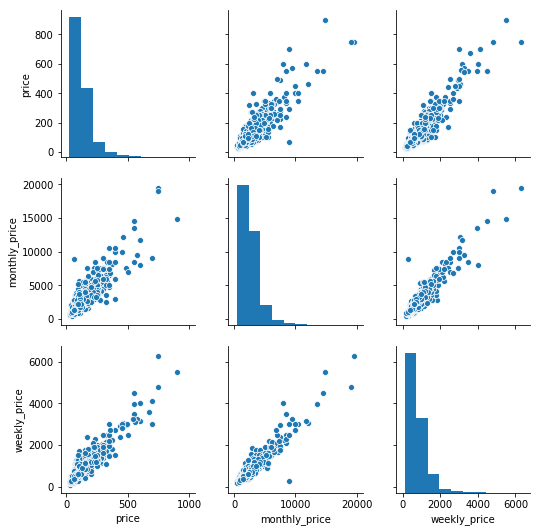

In [259]:
sns.pairplot(df[['price', 'monthly_price', 'weekly_price']]);

Remove **montly_price** and **weekly_price** because 1) they strongly correlate to price and 2) they large number of missing values.

Remove **square_feet** because number of high missing values

Remove **neighbourbood** and **neighbourhood_cleansed**and keep **neighbourhood_group_cleansed**

In [278]:
df.drop(columns=['monthly_price', 'weekly_price', 'square_feet', 'neighbourhood_cleansed', 'neighbourhood' ], inplace=True)

In [279]:
df.shape

(3171, 85)

#### Convert categorical columns with one-hot encodeing

In [293]:
df_onehot = pd.get_dummies(df, dummy_na=True)

In [283]:
#df.select_dtypes(include=np.number)

(3171, 72)

In [294]:
df_onehot.shape

(3171, 146)

#### Replace missing values by column mean

In [297]:
df_onehot.isna().sum().index[df_onehot.isna().sum()>0]

Index(['host_response_rate', 'host_acceptance_rate', 'bathrooms', 'bedrooms',
       'cleaning_fee', 'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value'],
      dtype='object')

In [301]:
df_onehot = df_onehot.apply(lambda x: x.fillna(x.mean()))

In [302]:
df_onehot.head()

,review_scores_rating,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,accommodates,bathrooms,bedrooms,beds,price,...,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_nan,require_guest_profile_picture_f,require_guest_profile_picture_t,require_guest_profile_picture_nan,require_guest_phone_verification_f,require_guest_phone_verification_t,require_guest_phone_verification_nan
0,95.0,96.000000,100.00000,3.0,3.0,4,1.0,1.0,1.0,85.0,...,0,1,0,0,1,0,0,1,0,0
1,96.0,98.000000,100.00000,6.0,6.0,4,1.0,1.0,1.0,150.0,...,0,0,1,0,0,1,0,0,1,0
2,97.0,67.000000,100.00000,2.0,2.0,11,4.5,5.0,7.0,975.0,...,0,0,1,0,1,0,0,1,0,0
3,92.0,100.000000,99.96288,2.0,2.0,6,2.0,3.0,3.0,450.0,...,0,0,1,0,1,0,0,1,0,0
4,95.0,95.223155,99.96288,1.0,1.0,2,1.0,1.0,1.0,120.0,...,0,0,1,0,1,0,0,1,0,0


In [304]:
sum(df_onehot.isna().sum())

0

### Regression model to predict rating and identify most important features

In [313]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor
import eli5

In [306]:
rating

'review_scores_rating'

In [349]:
X = df_onehot.drop(columns=rating)
y = df_onehot[rating]

##### Scale all columns in X

In [321]:
X.head()

,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,accommodates,bathrooms,bedrooms,beds,price,cleaning_fee,...,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_nan,require_guest_profile_picture_f,require_guest_profile_picture_t,require_guest_profile_picture_nan,require_guest_phone_verification_f,require_guest_phone_verification_t,require_guest_phone_verification_nan
0,0.072529,0.020906,-0.154029,-0.154029,0.309153,-0.436547,-0.346481,-0.642858,-0.464509,1.683579e-16,...,-0.57116,1.340260,-0.810395,0.0,0.320270,-0.320270,0.0,0.351103,-0.351103,0.0
1,0.259255,0.020906,-0.036553,-0.036553,0.309153,-0.436547,-0.346481,-0.642858,0.257769,-4.962829e-01,...,-0.57116,-0.746124,1.233966,0.0,-3.122363,3.122363,0.0,-2.848169,2.848169,0.0
2,-2.635002,0.020906,-0.193187,-0.193187,3.824654,5.464042,4.232280,4.552986,9.425151,5.664227e+00,...,-0.57116,-0.746124,1.233966,0.0,0.320270,-0.320270,0.0,0.351103,-0.351103,0.0
3,0.445981,0.000000,-0.193187,-0.193187,1.313581,1.249336,1.942899,1.089090,3.591363,1.517730e+00,...,-0.57116,-0.746124,1.233966,0.0,0.320270,-0.320270,0.0,0.351103,-0.351103,0.0
4,0.000000,0.000000,-0.232346,-0.232346,-0.695276,-0.436547,-0.346481,-0.642858,-0.075590,-4.962829e-01,...,-0.57116,-0.746124,1.233966,0.0,0.320270,-0.320270,0.0,0.351103,-0.351103,0.0


In [414]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [415]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2219, 145), (952, 145), (2219,), (952,))

In [416]:
lm_model = LinearRegression().fit(X_train, y_train)

In [417]:
pred = lm_model.predict(X_test)

In [423]:
r2_score(y_test, pred)

0.6233401878627783

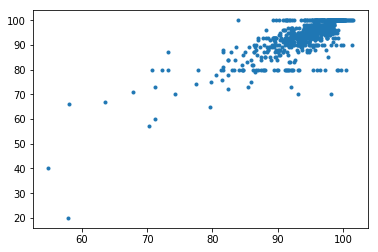

In [422]:
plt.plot(pred, y_test, '.');

In [826]:
gbm = GradientBoostingRegressor().fit(X_train, y_train)
pred = gbm.predict(X_test)

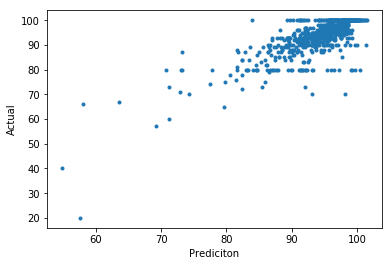

In [845]:
plt.plot(pred, y_test, '.');
plt.xlabel('Prediciton');
plt.ylabel('Actual');

##### Feature selection

In [356]:
lm_model.coef_

array([-1.46724608e-02, -4.40356366e-02, -1.25319893e-03, -1.25319894e-03,
        9.69760403e-02,  2.47479159e-04, -8.85237112e-02,  9.54951735e-02,
        2.19105464e-03, -1.54956827e-03, -1.76863400e-01, -5.68523722e-03,
        8.56292690e-02, -3.54046125e-05,  1.82626802e-03, -1.42310637e-02,
        1.18361847e-02,  1.53855113e-04,  2.23887467e-03, -4.82953195e-02,
       -2.09639177e-01,  1.42380923e+00,  2.58510589e+00,  1.07922243e+00,
        1.04255764e+00,  7.48021768e-01,  2.67972020e+00,  1.77347129e-01,
       -1.83295851e-02, -4.64429730e-02,  7.29913716e-01, -2.60274051e-02,
       -5.49884298e-01, -1.21049988e-01,  2.30473219e-01, -6.05789944e-01,
       -1.19588193e-01,  4.18631955e-01,  8.94388552e-01,  1.32734721e-01,
       -3.84267656e-02, -1.46680579e-01,  2.08268633e-01,  6.15154322e-01,
       -1.44206064e-01,  1.42625497e-01, -4.33514265e-01,  6.19188055e-01,
       -3.25902835e-01, -1.98006485e-01, -3.43378212e-01,  6.39370767e-02,
        3.06311260e-01,  

In [333]:
import eli5
from eli5.sklearn import PermutationImportance

In [827]:
perm = PermutationImportance(gbm, scoring='neg_mean_squared_error').fit(X_test, y_test)

In [828]:
eli5.show_weights(perm, feature_names=list(X_test.columns))

Weight,Feature
10.5511 ± 1.6514,review_scores_value
4.8657 ± 0.7342,review_scores_cleanliness
2.8661 ± 0.6144,review_scores_accuracy
1.3073 ± 0.4703,review_scores_checkin
1.0270 ± 0.5328,review_scores_communication
0.2665 ± 0.2404,cleaning_fee
0.2429 ± 0.2332,host_is_superhost_t
0.2366 ± 0.2233,maximum_nights
0.2309 ± 0.0888,Amenity_35
0.1936 ± 0.1163,price


In [427]:
importance = pd.Series(data=perm.feature_importances_, index=X_test.columns).sort_values(ascending=False)

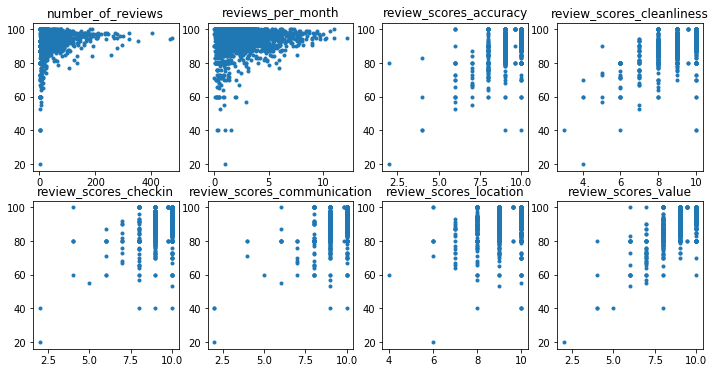

In [471]:
nrow, ncol = 2, 4
fig, axes = plt.subplots(2, 4, figsize=(12, 6) )
counter =0 
for i in range(nrow):
    for j in range(ncol):
        axes[i,j].plot(X[review_cols[counter]], y,'.')
        axes[i,j].title.set_text(review_cols[counter])
        counter = counter + 1

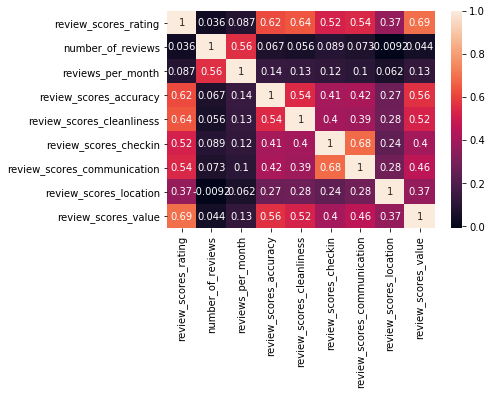

In [479]:
sns.heatmap(pd.concat([y,X[review_cols]], axis=1).corr(), annot=True)

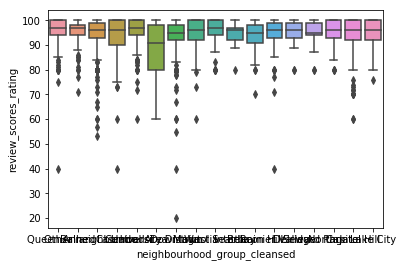

In [530]:
sns.boxplot(data=df, x=df.neighbourhood_group_cleansed, y=df.review_scores_rating)

In [532]:
df.groupby('neighbourhood_group_cleansed')['review_scores_rating'].mean()

neighbourhood_group_cleansed
Ballard                95.533679
Beacon Hill            94.019417
Capitol Hill           94.184783
Cascade                92.461538
Central Area           96.009404
Delridge               95.861538
Downtown               93.958333
Interbay               93.777778
Lake City              94.375000
Magnolia               93.787234
Northgate              94.692308
Other neighborhoods    94.562500
Queen Anne             95.443089
Rainier Valley         94.731343
Seward Park            95.025641
University District    88.437500
West Seattle           95.864198
Name: review_scores_rating, dtype: float64

In [553]:
fn = pd.Series(range(len(features_no_reviews)), index = features_no_reviews)

In [559]:
df.groupby('neighbourhood_group_cleansed')['review_scores_rating'].mean().sort_values()

neighbourhood_group_cleansed
University District    88.437500
Cascade                92.461538
Interbay               93.777778
Magnolia               93.787234
Downtown               93.958333
Beacon Hill            94.019417
Capitol Hill           94.184783
Lake City              94.375000
Other neighborhoods    94.562500
Northgate              94.692308
Rainier Valley         94.731343
Seward Park            95.025641
Queen Anne             95.443089
Ballard                95.533679
Delridge               95.861538
West Seattle           95.864198
Central Area           96.009404
Name: review_scores_rating, dtype: float64

**Partial dependence plot to marginal effect of predictors**

In [571]:
# PDPBox
from pdpbox import pdp

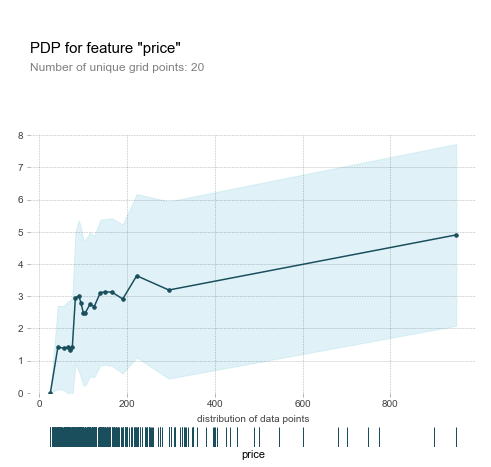

In [802]:
feat = 'price'
pdp_dist = pdp.pdp_isolate(model=gbm_no_reviews, dataset=X_test[features_no_reviews], 
                           model_features=features_no_reviews, feature=feat, num_grid_points=20)
_, ax = pdp.pdp_plot(pdp_isolate_out=pdp_dist, feature_name=feat, plot_pts_dist=True, plot_lines=False, frac_to_plot=0.1, figsize=(8,8) )
ax['pdp_ax']['_pdp_ax'].set_ylim((0,8));

In [809]:
top_features = eli5.show_weights(perm_no_reviews, feature_names=X_test[features_no_reviews].columns.tolist(), top=20)

In [830]:
pd.Series(perm.feature_importances_, index=X.columns).sort_values(ascending=False)

review_scores_value                                 10.551107
review_scores_cleanliness                            4.865705
review_scores_accuracy                               2.866096
review_scores_checkin                                1.307347
review_scores_communication                          1.027003
cleaning_fee                                         0.266512
host_is_superhost_t                                  0.242889
maximum_nights                                       0.236611
Amenity_35                                           0.230948
price                                                0.193611
Amenity_8                                            0.163914
review_scores_location                               0.149886
reviews_per_month                                    0.146267
bathrooms                                            0.137202
accommodates                                         0.123046
bedrooms                                             0.119006
Amenity_

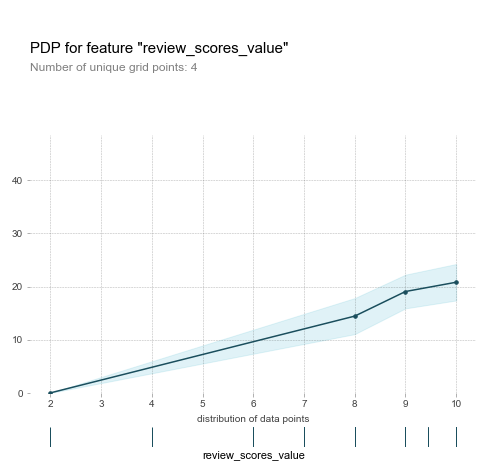

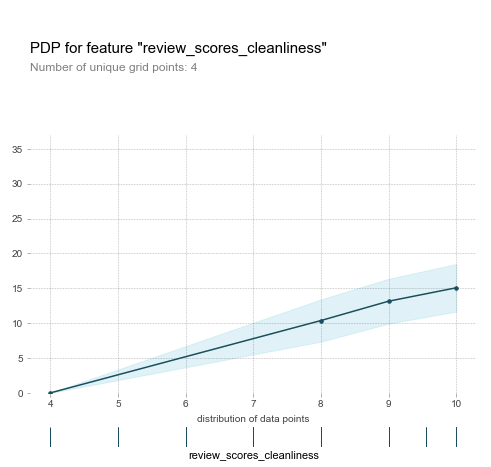

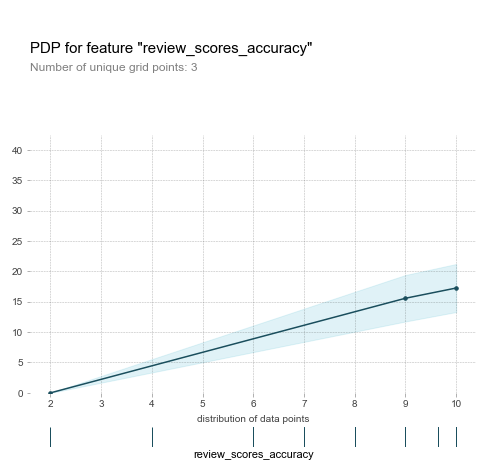

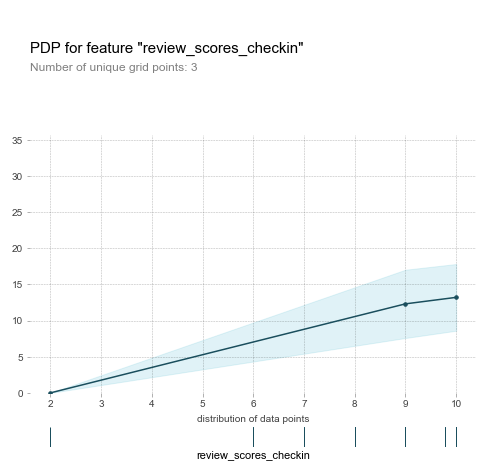

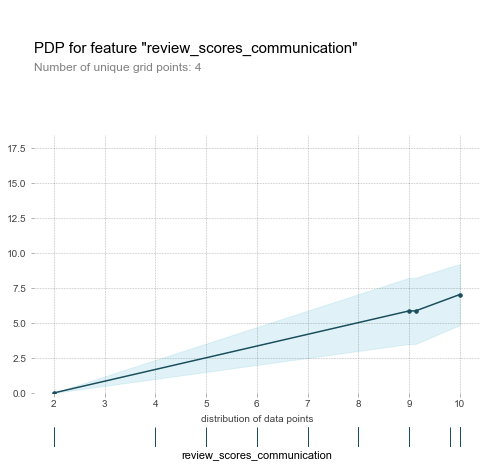

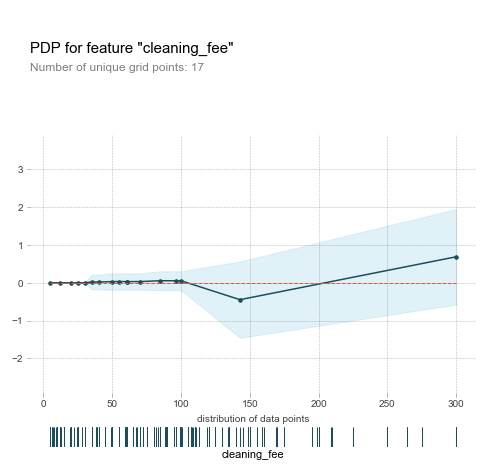

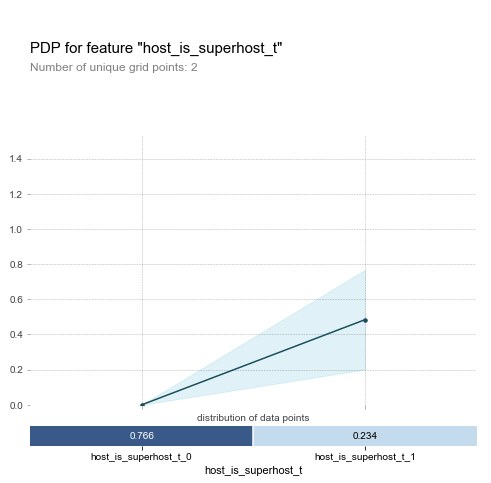

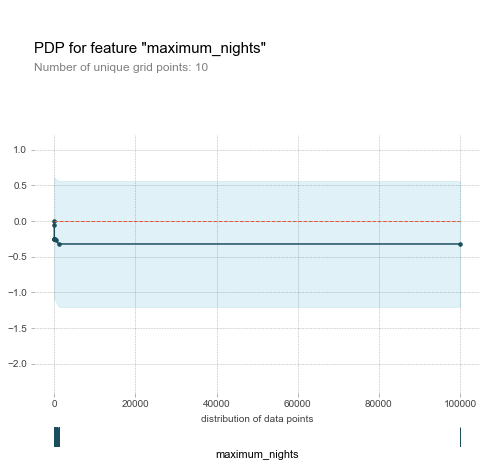

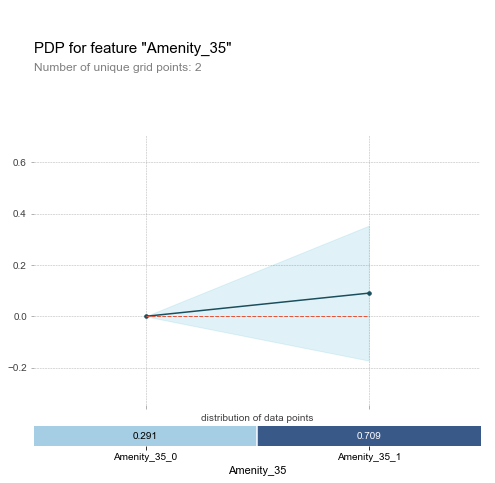

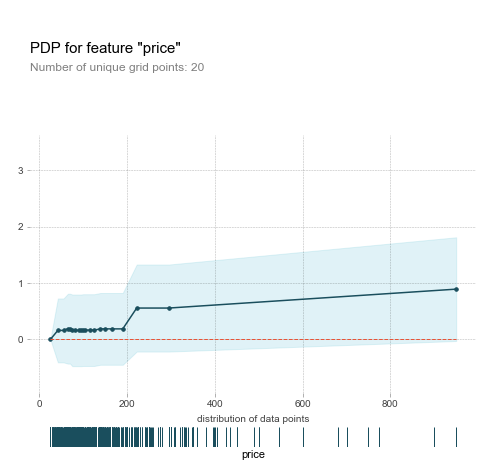

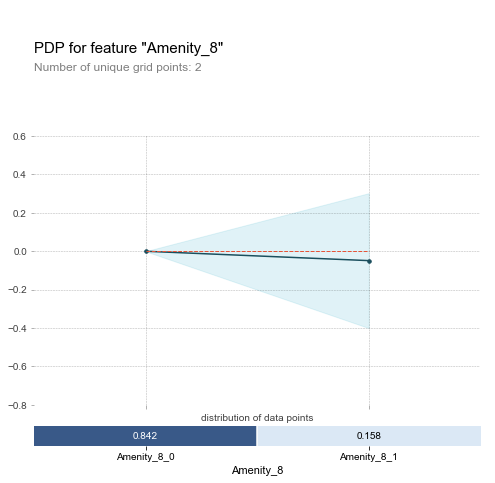

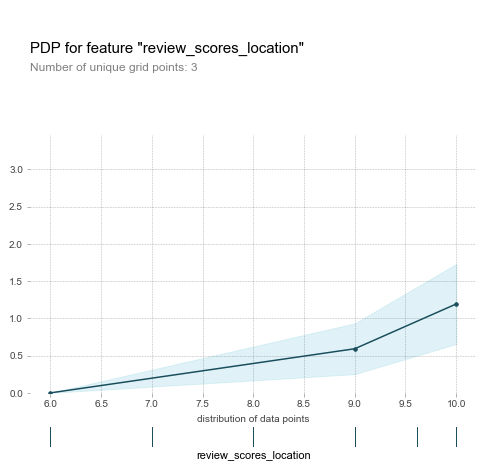

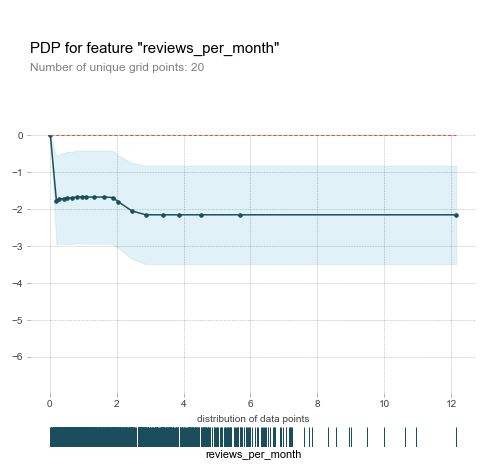

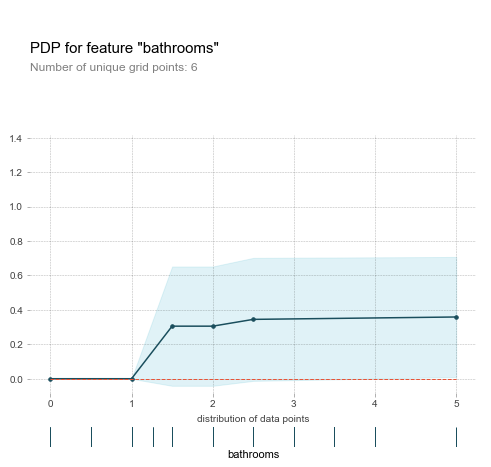

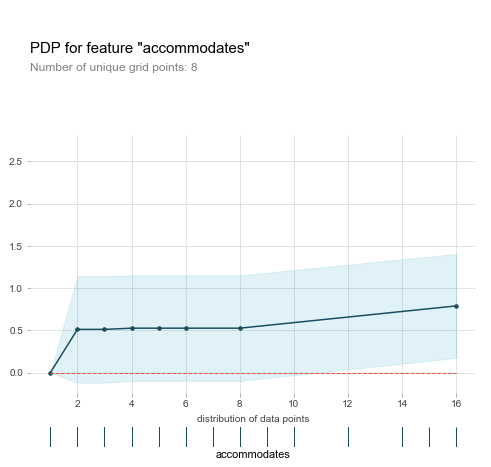

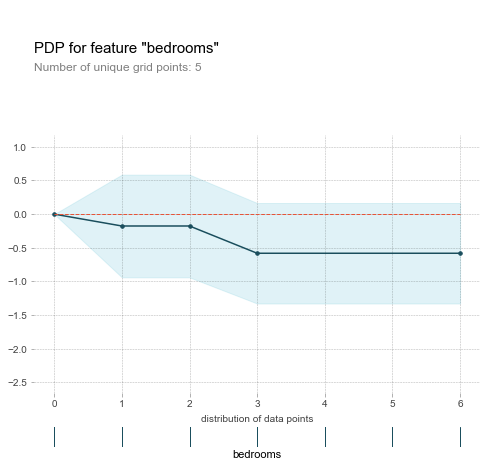

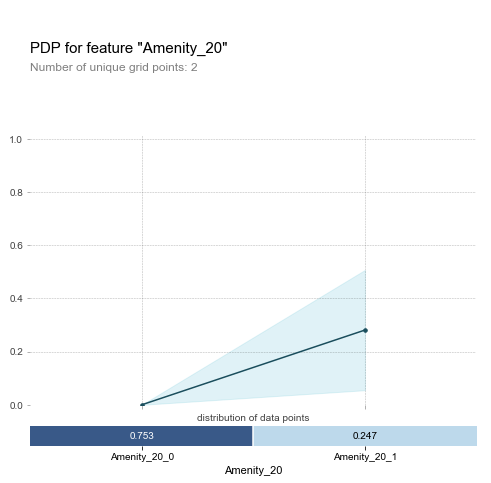

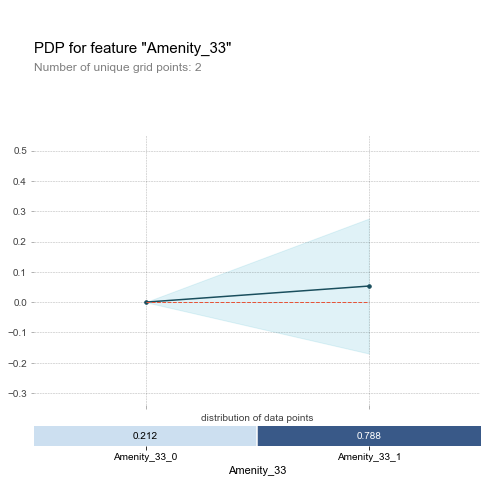

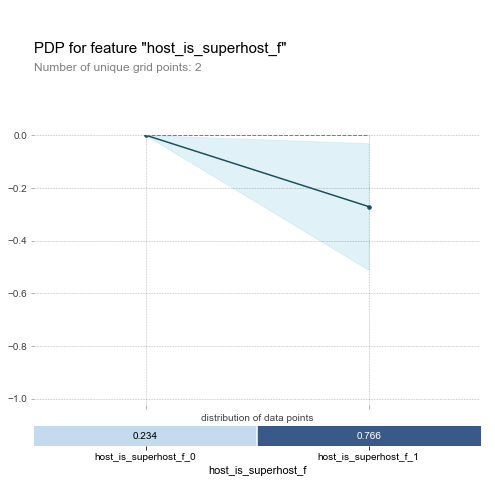

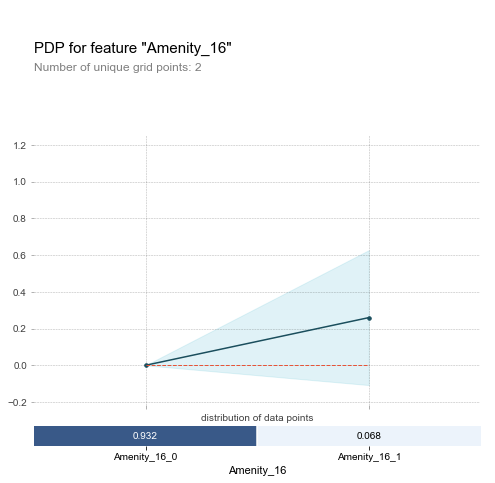

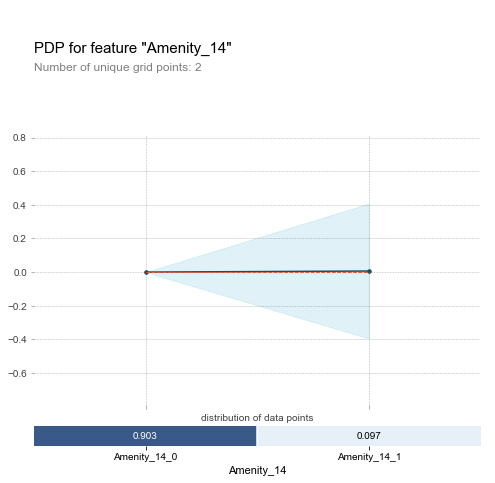

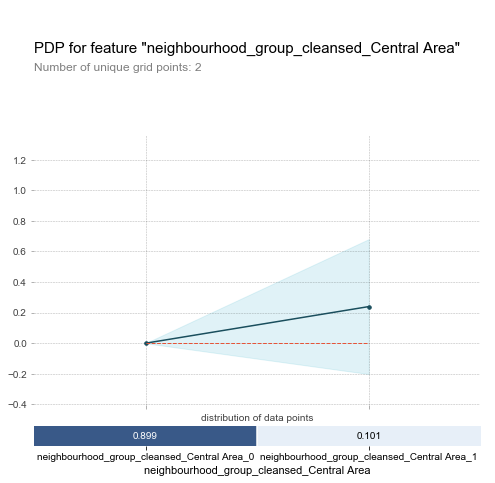

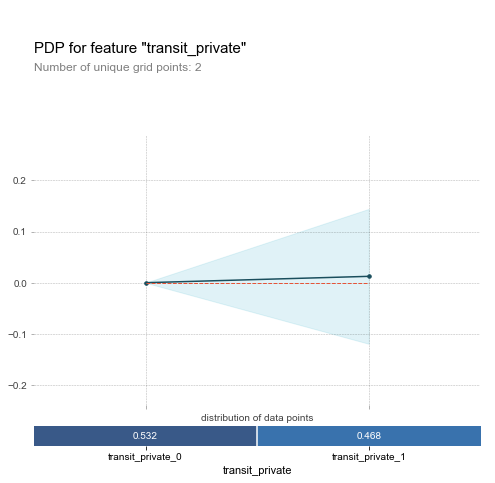

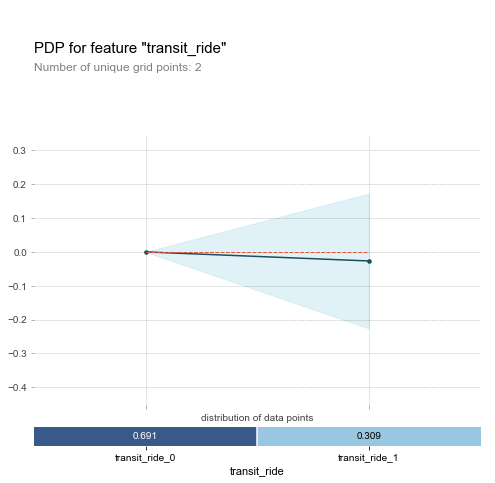

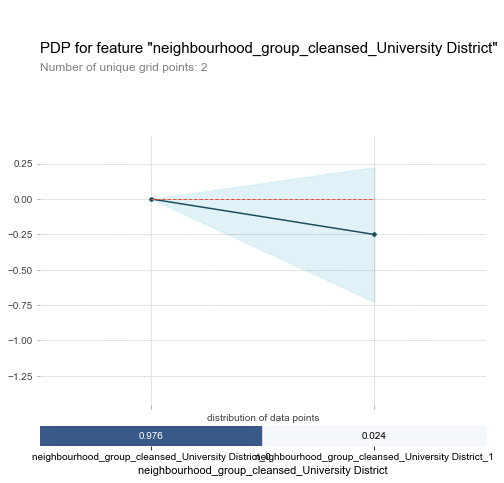

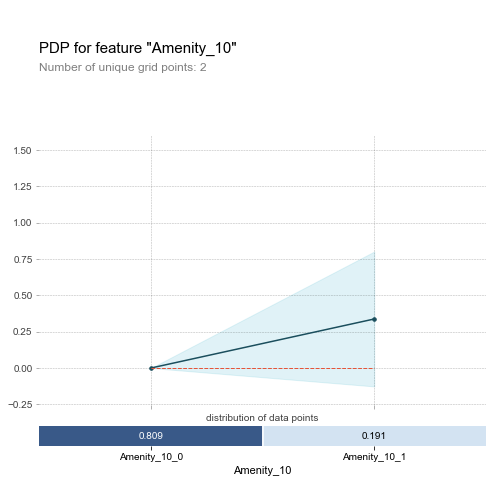

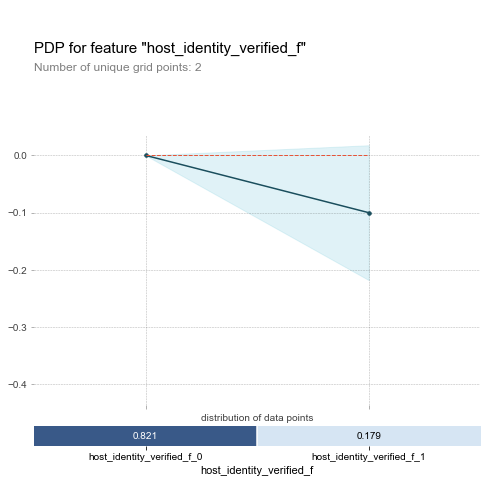

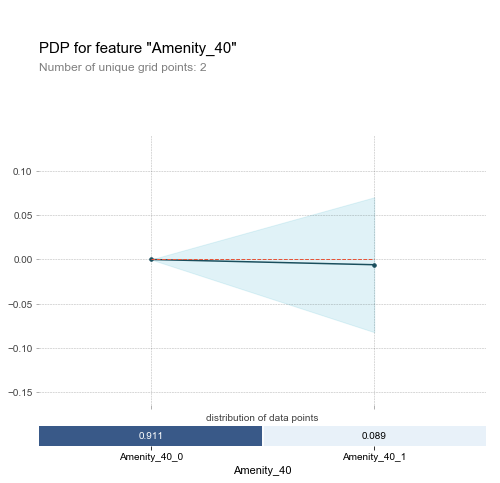

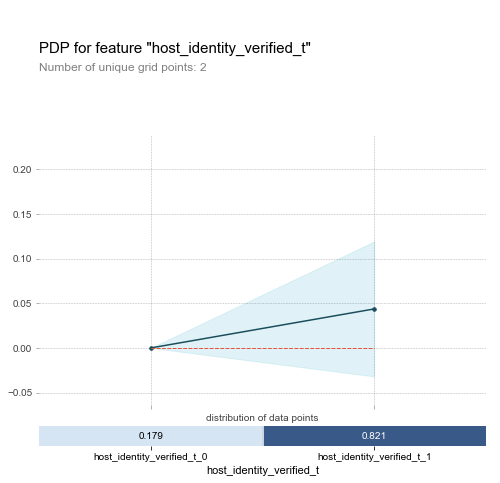

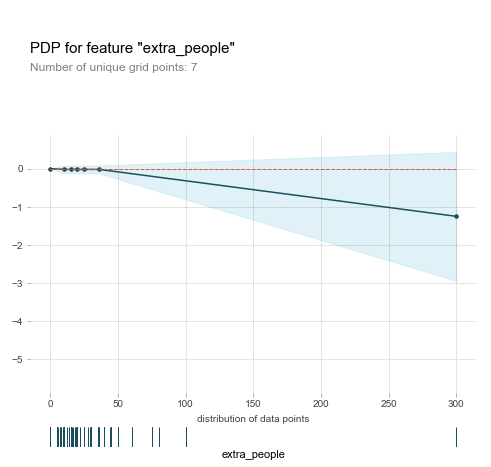

In [835]:
feats = list(pd.Series(perm.feature_importances_, index=X.columns).sort_values(ascending=False)[:30].index)
for feat in feats:
    pdp_dist = pdp.pdp_isolate(model=gbm, dataset=X_test, 
                           model_features=X.columns.tolist(), feature=feat, num_grid_points=20)
    _, ax = pdp.pdp_plot(pdp_isolate_out=pdp_dist, feature_name=feat, plot_pts_dist=True, plot_lines=False, frac_to_plot=0.1, figsize=(8,8) )

In [834]:
list(enumerate(amenities))

[(0, 'Indoor Fireplace'),
 (1, 'Essentials'),
 (2, 'Wheelchair Accessible'),
 (3, 'Wireless Internet'),
 (4, 'Doorman'),
 (5, 'Hair Dryer'),
 (6, 'Washer'),
 (7, 'Other pet(s)'),
 (8, '24-Hour Check-in'),
 (9, 'Family/Kid Friendly'),
 (10, 'Safety Card'),
 (11, 'Elevator in Building'),
 (12, 'Fire Extinguisher'),
 (13, 'Heating'),
 (14, 'Gym'),
 (15, 'Pets Allowed'),
 (16, 'Suitable for Events'),
 (17, 'Breakfast'),
 (18, 'First Aid Kit'),
 (19, 'Pool'),
 (20, 'Pets live on this property'),
 (21, 'Carbon Monoxide Detector'),
 (22, 'Lock on Bedroom Door'),
 (23, 'Cat(s)'),
 (24, 'TV'),
 (25, 'Kitchen'),
 (26, 'Free Parking on Premises'),
 (27, 'Smoking Allowed'),
 (28, 'Hangers'),
 (29, 'Internet'),
 (30, 'Washer / Dryer'),
 (31, 'Air Conditioning'),
 (32, 'Buzzer/Wireless Intercom'),
 (33, 'Dryer'),
 (34, 'Dog(s)'),
 (35, 'Shampoo'),
 (36, 'Smoke Detector'),
 (37, 'Laptop Friendly Workspace'),
 (38, 'Cable TV'),
 (39, 'Iron'),
 (40, 'Hot Tub')]

Rating positive: value, cleanliness, accuracy, checkin, communication, location all positively correlate to overall rating

Top amenities help with ratings: shampoo, pets live on this property, dryer, suitable for events, safty card

Area: central area +; university district -

Plus:
more than two bathrooms
being a superhost helps
host identity verified

In [832]:
 list(pd.Series(perm.feature_importances_, index=X.columns).sort_values(ascending=False)[:20].index)

['review_scores_value',
 'review_scores_cleanliness',
 'review_scores_accuracy',
 'review_scores_checkin',
 'review_scores_communication',
 'cleaning_fee',
 'host_is_superhost_t',
 'maximum_nights',
 'Amenity_35',
 'price',
 'Amenity_8',
 'review_scores_location',
 'reviews_per_month',
 'bathrooms',
 'accommodates',
 'bedrooms',
 'Amenity_20',
 'Amenity_33',
 'host_is_superhost_f',
 'Amenity_16']

In [ ]:
eli5.show_weights(perm, feature_names=list(X_test.columns))

Predcition of price

Reviews:
Is positive and negative review affected by season or by listing

For the same listing, does review likelihood of positive depend on time/season? If so, what is the best time for positive review?

Overall review pos/neg vs. time/season


Calendar:

What months are the best for leasing. volume and vacancy rate;


## Price regression

In [836]:
X.shape

(3171, 145)

In [842]:
features_price_model = features_no_reviews.copy()
features_price_model.remove('price')

In [846]:
X_price = X[features_price_model]
y_price = X['price']

In [847]:
X_price.shape, y_price.shape

((3171, 138), (3171,))

In [848]:
X_price_train, X_price_test, y_price_train, y_price_test = train_test_split(X_price, y_price, test_size=0.3, random_state=42)

In [849]:
price_model = GradientBoostingRegressor().fit(X_price_train, y_price_train)

In [850]:
pred_price = price_model.predict(X_price_test)

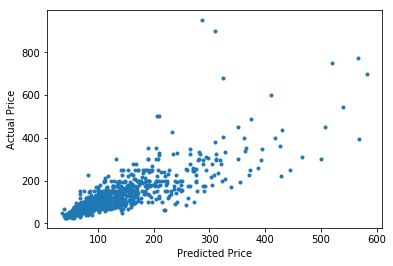

In [852]:
plt.plot(pred_price, y_price_test, '.');
plt.xlabel('Predicted Price');
plt.ylabel('Actual Price');

In [854]:
perm_price = PermutationImportance(price_model, scoring='neg_mean_squared_error').fit(X_price_test, y_price_test)

In [857]:
eli5.show_weights(perm_price, feature_names=features_price_model)

Weight,Feature
1575.1960 ± 174.1483,bedrooms
536.2199 ± 78.7598,room_type_Entire home/apt
438.9799 ± 236.1822,bathrooms
379.6945 ± 94.2736,accommodates
351.8919 ± 92.7625,cleaning_fee
207.6535 ± 120.8873,neighbourhood_group_cleansed_Cascade
155.0576 ± 54.6380,reviews_per_month
130.0853 ± 182.1653,neighbourhood_group_cleansed_Queen Anne
117.0369 ± 31.9020,host_acceptance_rate
82.5970 ± 54.5863,extra_people


In [859]:
pd.Series(perm_price.feature_importances_, index=features_price_model).sort_values(ascending=False)[:30]

bedrooms                                       1575.195993
room_type_Entire home/apt                       536.219863
bathrooms                                       438.979945
accommodates                                    379.694491
cleaning_fee                                    351.891921
neighbourhood_group_cleansed_Cascade            207.653539
reviews_per_month                               155.057568
neighbourhood_group_cleansed_Queen Anne         130.085316
host_acceptance_rate                            117.036945
extra_people                                     82.597013
Amenity_35                                       77.381252
neighbourhood_group_cleansed_Capitol Hill        67.356168
availability_365                                 57.808959
Amenity_11                                       47.010917
Amenity_4                                        45.645447
availability_90                                  43.025341
Amenity_31                                       38.8490

**Partial dependence plots for marginal effects of predictors**

[(0, 'Indoor Fireplace'),
 (1, 'Essentials'),
 (2, 'Wheelchair Accessible'),
 (3, 'Wireless Internet'),
 (4, 'Doorman'),
 (5, 'Hair Dryer'),
 (6, 'Washer'),
 (7, 'Other pet(s)'),
 (8, '24-Hour Check-in'),
 (9, 'Family/Kid Friendly'),
 (10, 'Safety Card'),
 (11, 'Elevator in Building'),
 (12, 'Fire Extinguisher'),
 (13, 'Heating'),
 (14, 'Gym'),
 (15, 'Pets Allowed'),
 (16, 'Suitable for Events'),
 (17, 'Breakfast'),
 (18, 'First Aid Kit'),
 (19, 'Pool'),
 (20, 'Pets live on this property'),
 (21, 'Carbon Monoxide Detector'),
 (22, 'Lock on Bedroom Door'),
 (23, 'Cat(s)'),
 (24, 'TV'),
 (25, 'Kitchen'),
 (26, 'Free Parking on Premises'),
 (27, 'Smoking Allowed'),
 (28, 'Hangers'),
 (29, 'Internet'),
 (30, 'Washer / Dryer'),
 (31, 'Air Conditioning'),
 (32, 'Buzzer/Wireless Intercom'),
 (33, 'Dryer'),
 (34, 'Dog(s)'),
 (35, 'Shampoo'),
 (36, 'Smoke Detector'),
 (37, 'Laptop Friendly Workspace'),
 (38, 'Cable TV'),
 (39, 'Iron'),
 (40, 'Hot Tub')]

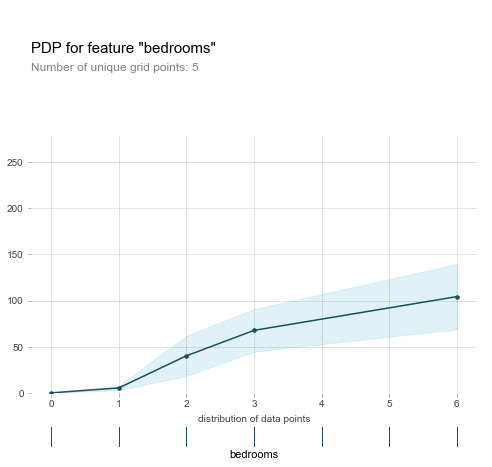

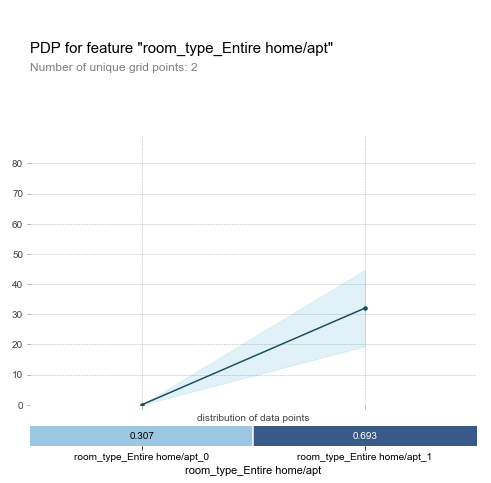

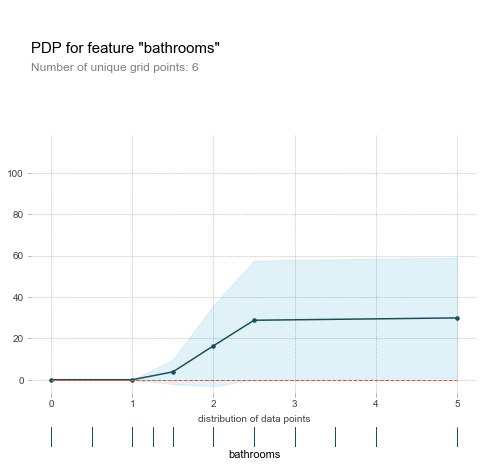

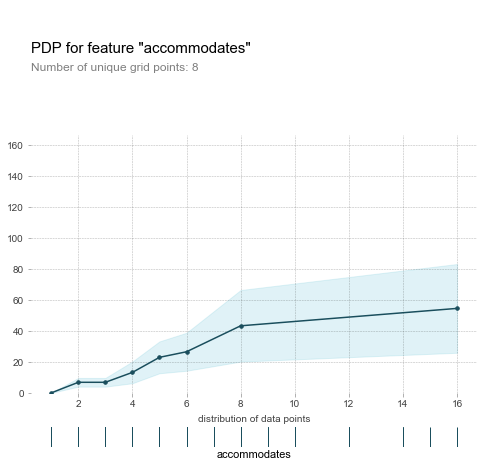

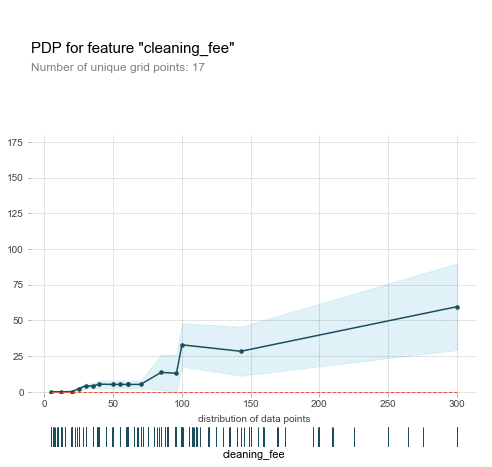

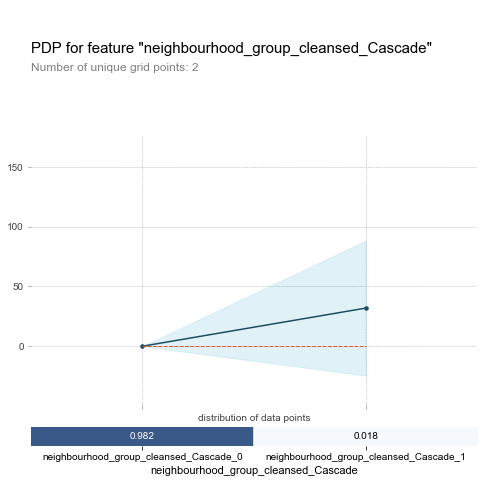

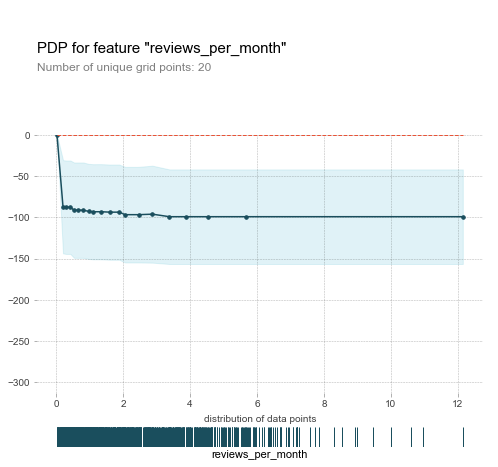

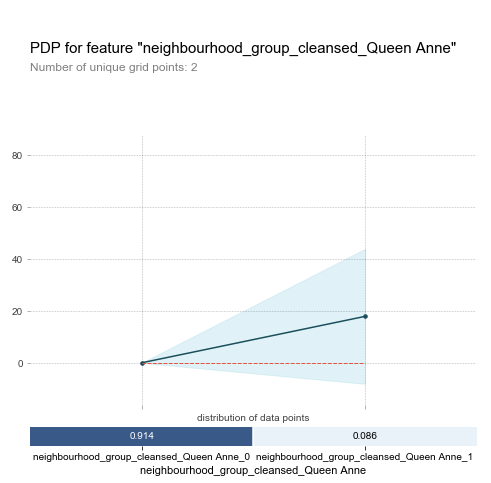

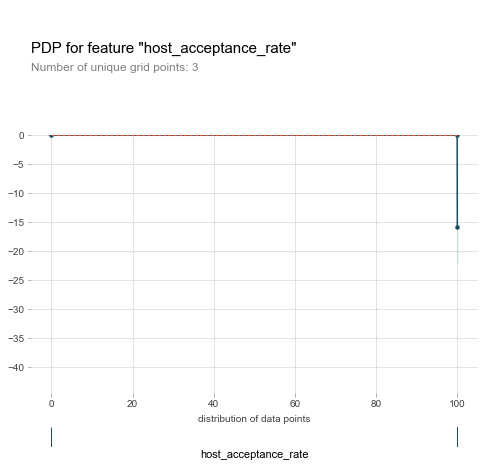

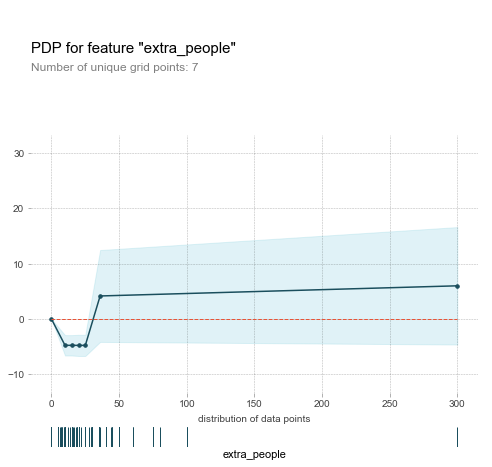

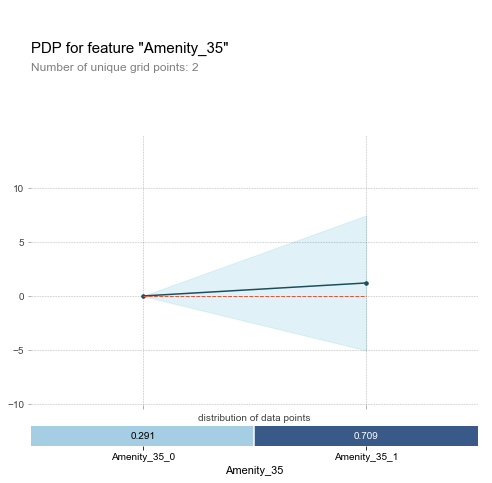

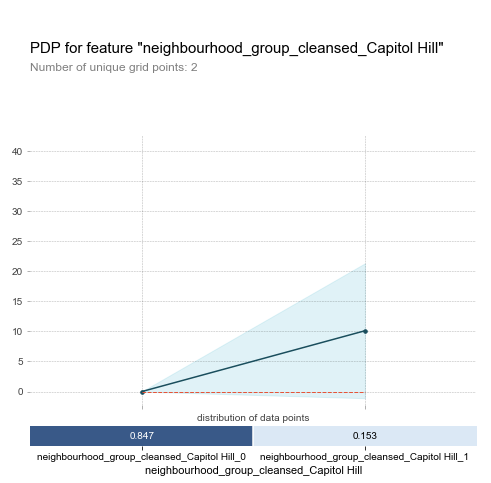

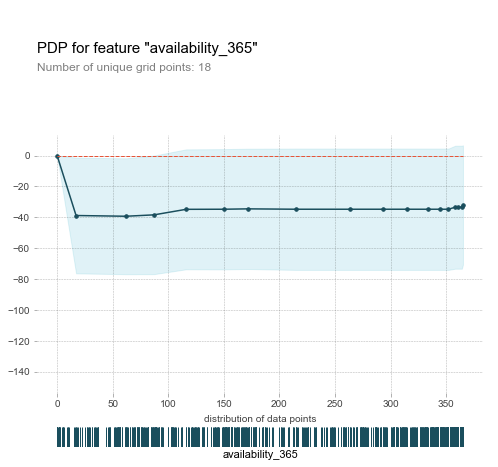

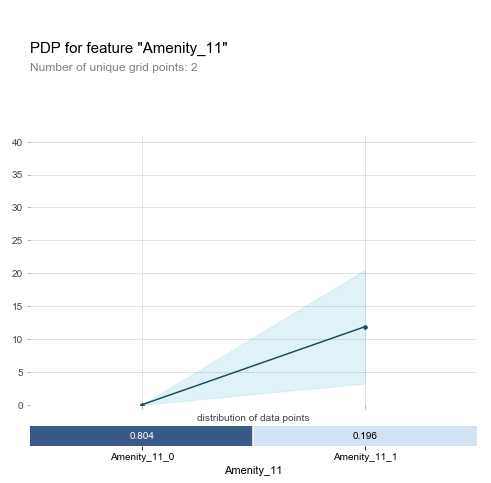

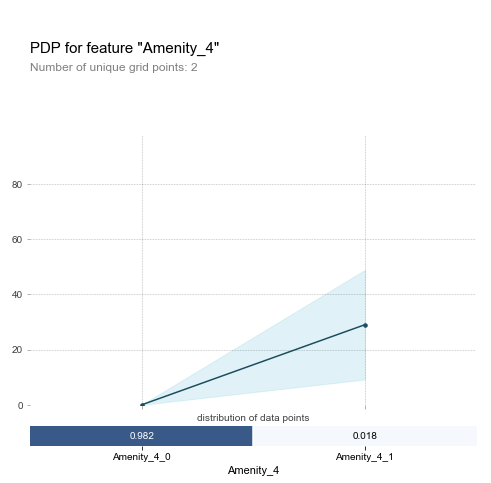

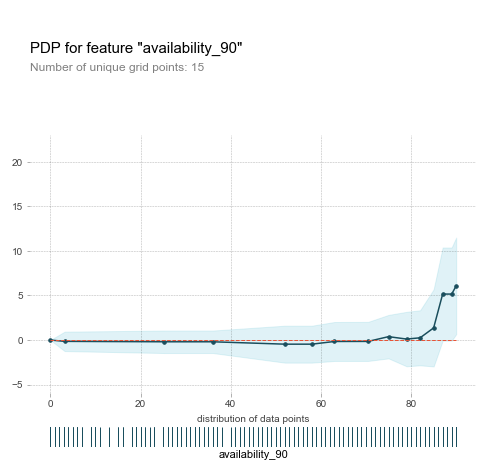

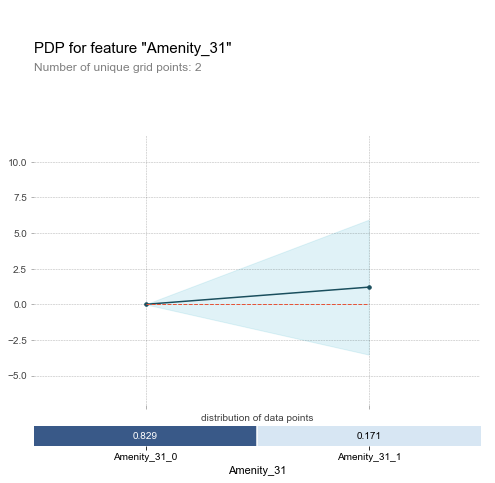

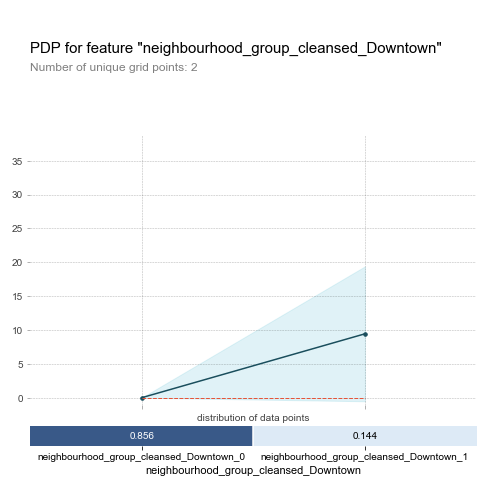

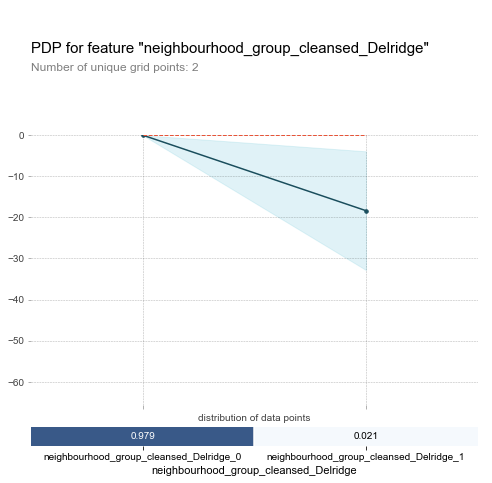

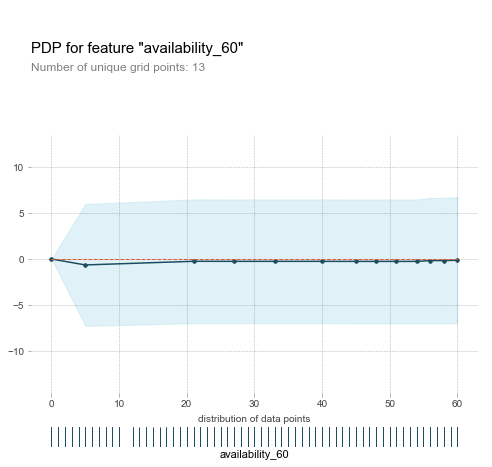

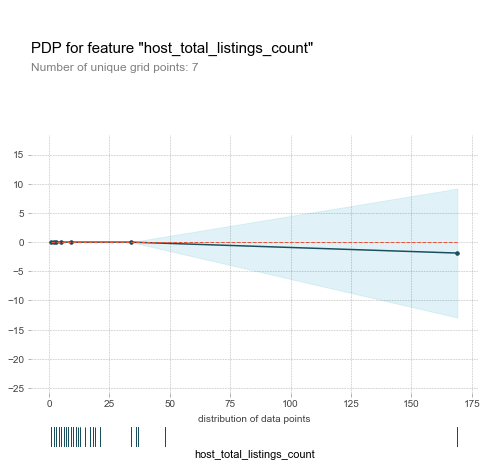

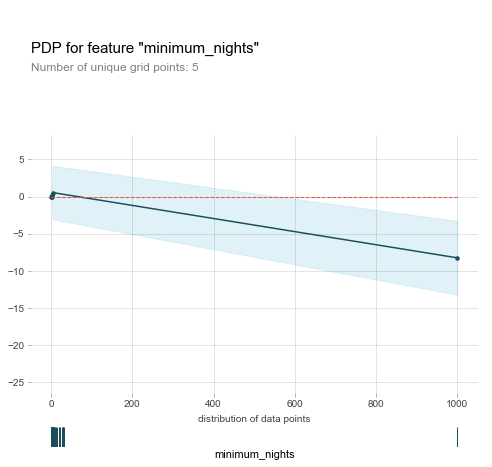

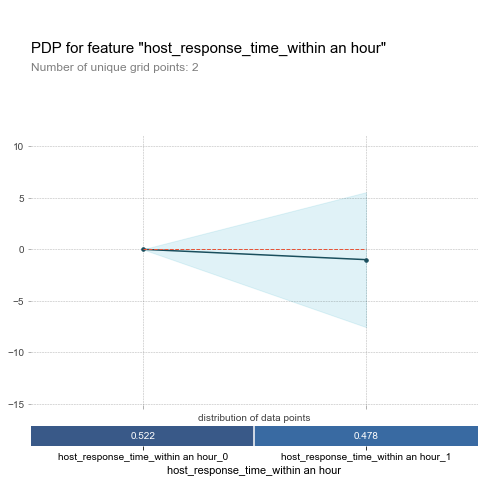

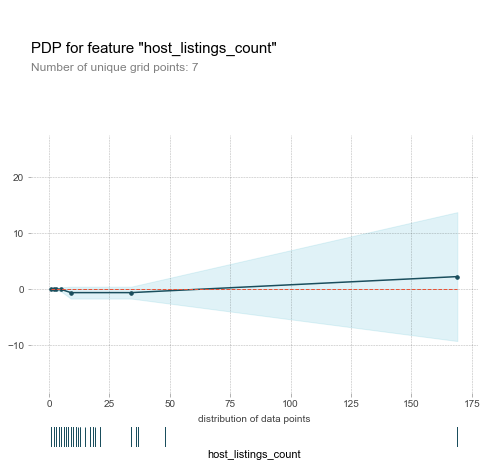

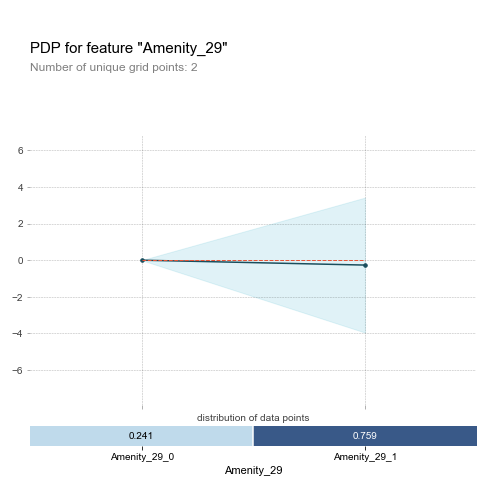

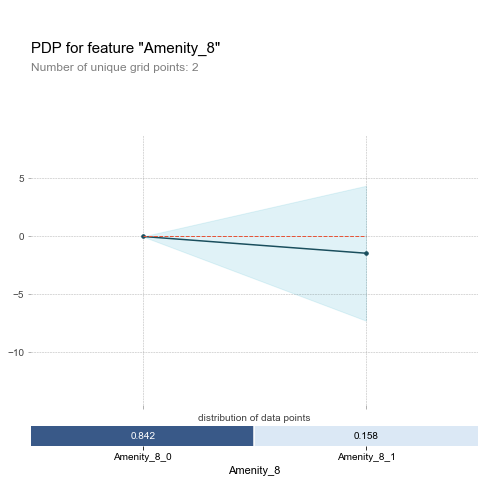

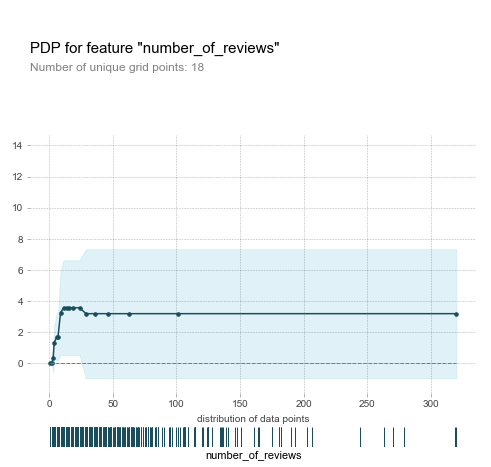

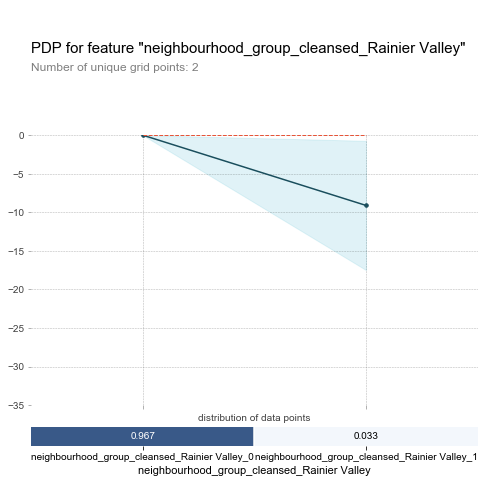

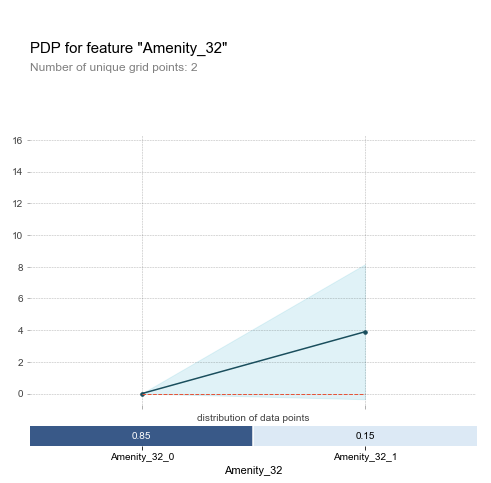

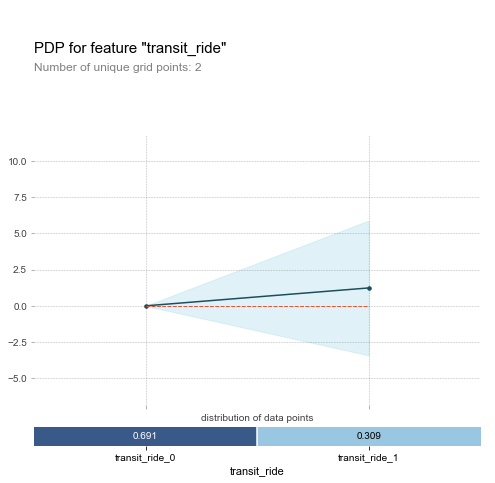

In [874]:
feats_price = list(pd.Series(perm_price.feature_importances_, index=features_price_model).sort_values(ascending=False)[:30].index)
for feat_price in feats_price:
    pdp_dist = pdp.pdp_isolate(model=price_model, dataset=X_price_test, 
                           model_features=features_price_model, feature=feat_price, num_grid_points=20)
    _, ax = pdp.pdp_plot(pdp_isolate_out=pdp_dist, feature_name=feat_price, plot_pts_dist=True, plot_lines=False, frac_to_plot=0.1, figsize=(8,8) )

list(enumerate(amenities))

higher price for these amenities: doorman, shampoo, elevator in building, air conditioning, buzzer/wireless intercom, 
suprisingly lower price with 24 hour check-in

neighborhoods: higher price: Cascade, Queen Anne

In [877]:
neighborhood_cols = [x for x in X_price.columns if 'neighbo' in x]

In [880]:
X_price_test.query('Amenity_8==1')['bedrooms'].value_counts()

1.0    70
2.0    40
0.0    26
3.0     9
4.0     5
Name: bedrooms, dtype: int64

In [882]:
X_price_test['bedrooms'].value_counts()

1.0    593
2.0    165
0.0     92
3.0     74
4.0     20
5.0      5
6.0      3
Name: bedrooms, dtype: int64